In [1]:
# Import packages and modules
import pandas as pd
import numpy as np 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os.path
import os

In [2]:
df  = pd.read_csv("/kaggle/input/dataset-dk3619-preprocessed-v1/dataset_dk3619_preprocessed_v1.csv")


print(df['DK3619Code'])
dkcode_list = list(set(df['DK3619Code'].to_list()))
dkcode_list.sort()
id2dkcode = enumerate(dkcode_list)
id2dkcode = dict(id2dkcode)

dkcode2id = {}
for i in id2dkcode.items():
    dkcode2id[i[1]] = i[0]


print(dict(dkcode2id))

# Export the dkcode_list to a CSV file
dkcode_df = pd.DataFrame(dkcode_list, columns=['DK3619Code'])
dkcode_df.to_csv('dkcode_list.csv', index=False)

### Mapping data to numberic
# df['DK3619Code'] = df['DK3619Code'].map(dkcode2id)

### Season mapping 

seasons_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Autumn': 2,
    'Winter': 3
}

df['season'] = df['season'].map(seasons_mapping)

# Convert holiday to binary indicator
df['holiday'] = df['holiday'].apply(lambda x: 0 if x == 0 else 1)


# Xóa tất cả các hàng có giá trị null
df_cleaned = df.dropna()

0                 A_A
1                C_CA
2                C_CC
3          C_CE_CF_CD
4                C_CG
              ...    
3323742          Q_QB
3323743           R_R
3323744           S_S
3323745    C_CE_CF_CD
3323746          M_MA
Name: DK3619Code, Length: 3323747, dtype: object
{'A_A': 0, 'C_CA': 1, 'C_CC': 2, 'C_CE_CF_CD': 3, 'C_CG': 4, 'C_CH': 5, 'C_CI': 6, 'C_CJ': 7, 'C_CK': 8, 'C_CL': 9, 'C_CM_CB': 10, 'D_D': 11, 'E_E': 12, 'F_F': 13, 'G_G': 14, 'H_H': 15, 'I_I': 16, 'J_JA': 17, 'J_JB_JC': 18, 'K_K': 19, 'L_L': 20, 'M_MA': 21, 'M_MB': 22, 'M_MC': 23, 'N_N': 24, 'O_O': 25, 'PR_PR': 26, 'P_P': 27, 'Q_QA': 28, 'Q_QB': 29, 'R_R': 30, 'S_S': 31}


## With Lag_24

In [3]:
columns = ['HourUTC', 'HourDK', 'hour', 'day_of_week',
           'quarter', 'month', 'year', 'day_of_year',
           'day_of_month', 'week_of_year', 'season', 'holiday', 
           'lag_24','lag_25','lag_26','lag_27','lag_28','lag_29',
           'lag_30','lag_31','lag_32','lag_33','lag_34','lag_35','lag_36',
           'lag_37','lag_38','lag_39','lag_40','lag_41','lag_42','lag_43',
           'lag_44','lag_45','lag_46','lag_47','lag_48','Consumption_MWh']

# Split function
def split_train_test(df, split_time):
    df_train = df.loc[df['HourDK'] < split_time]
    df_test = df.loc[df['HourDK'] >= split_time]
    return df_train, df_test

def compute_predictions_df(model, X, y):
    y_pred = model.predict(X)
    df = pd.DataFrame({'actual': y.values.flatten(), 'prediction': y_pred.flatten()}, index=X.index)
    df["squared_error"] = (df["actual"] - df["prediction"])**2
    return df

Training RandomForestRegressor model with DKCode:  A_A


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 7.352022004009529
Mean Squared Error (MSE): 130.35127579428556
Root Mean Squared Error (RMSE): 11.417148321463007
R-squared (R²): 0.9017439849801823
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  7.352022  130.351276  11.417148  0.901744
         Feature       A_A
0           hour  0.000285
1    day_of_week  0.002963
2        quarter  0.000057
3          month  0.000104
4           year  0.000218
5    day_of_year  0.000816
6   day_of_month  0.000739
7   week_of_year  0.000317
8         season  0.000156
9        holiday  0.000097
10        lag_24  0.914876
11        lag_25  0.000513
12        lag_26  0.000382
13        lag_27  0.000378
14        lag_28  0.000361
15        lag_29  0.000329
16        lag_30  0.000353
17        lag_31  0.000372
18        lag_32  0.000406
19        lag_33  0.000481
20        lag_34  0.000484
21        lag_35  0.000470
22        lag_36  0.000580
23        lag_37  0.000712
24        lag_38  0.000512
25        

/tmp/ipykernel_24/1506323813.py:80: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  performance_df = pd.concat([performance_df, pd.DataFrame({


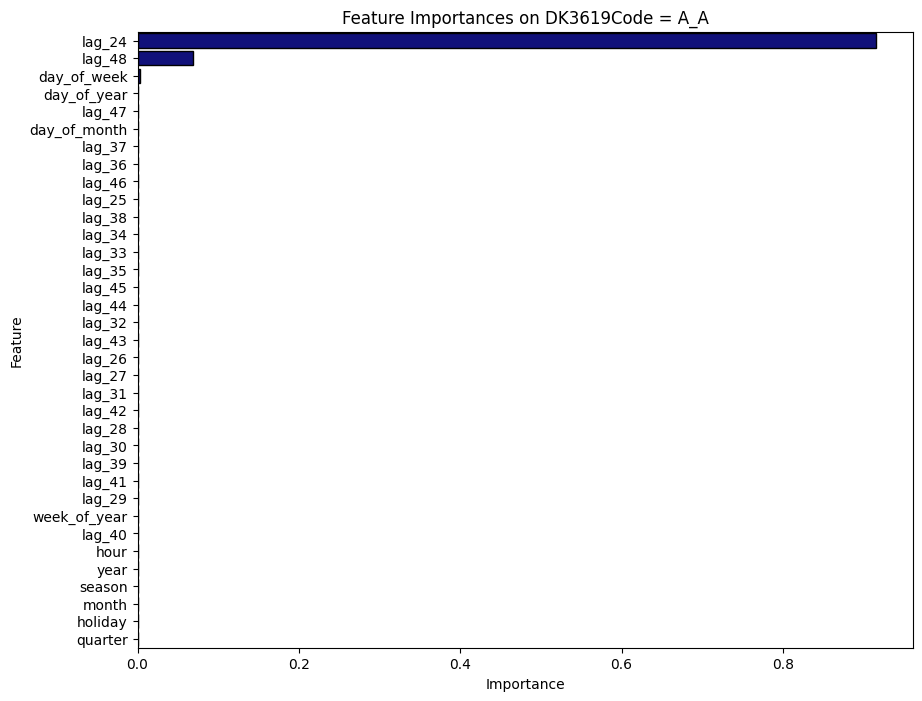

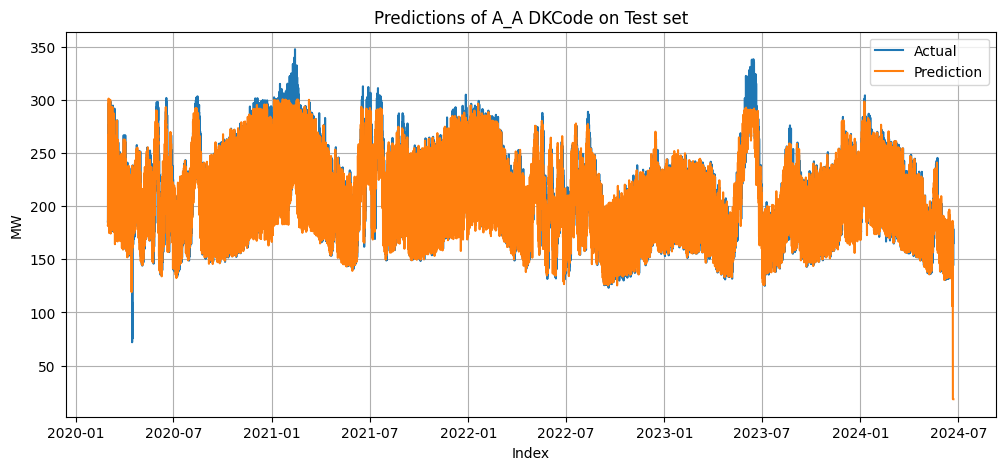

Training RandomForestRegressor model with DKCode:  C_CA


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 8.148452153809133
Mean Squared Error (MSE): 150.36249311783757
Root Mean Squared Error (RMSE): 12.262238503545655
R-squared (R²): 0.9362390620156816
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  7.352022  130.351276  11.417148  0.901744
1       C_CA  8.148452  150.362493  12.262239  0.936239
         Feature       A_A      C_CA
0   day_of_month  0.000739  0.001673
1    day_of_week  0.002963  0.208221
2    day_of_year  0.000816  0.009408
3        holiday  0.000097  0.015445
4           hour  0.000285  0.021737
5         lag_24  0.914876  0.638233
6         lag_25  0.000513  0.002267
7         lag_26  0.000382  0.001547
8         lag_27  0.000378  0.001077
9         lag_28  0.000361  0.000803
10        lag_29  0.000329  0.000758
11        lag_30  0.000353  0.001050
12        lag_31  0.000372  0.000773
13        lag_32  0.000406  0.001086
14        lag_33  0.000481  0.001090
15        lag_34  0.000484  0.001154
16        lag_35  0.000470 

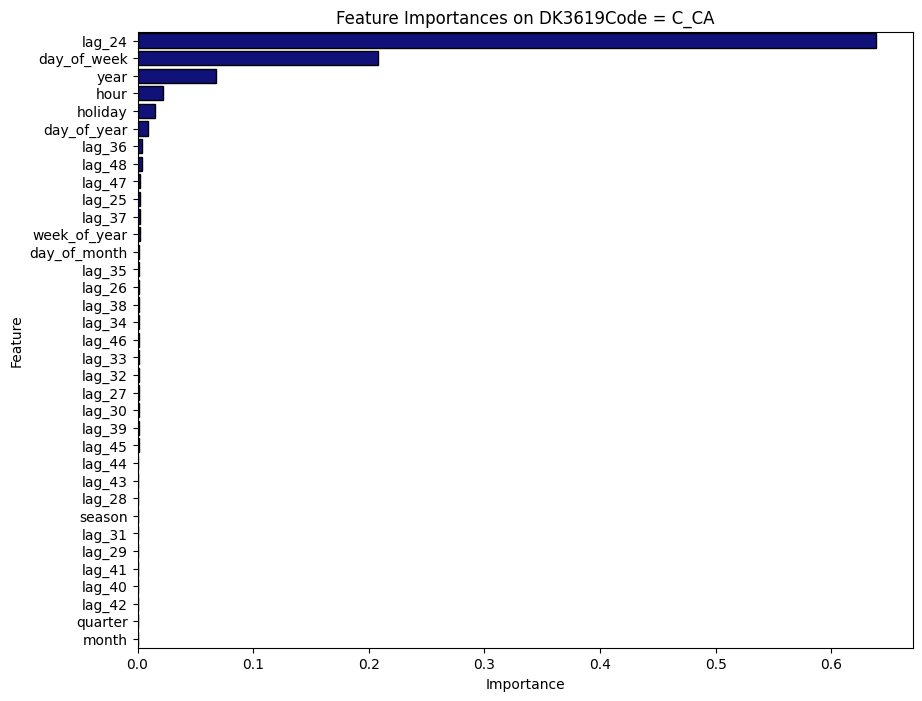

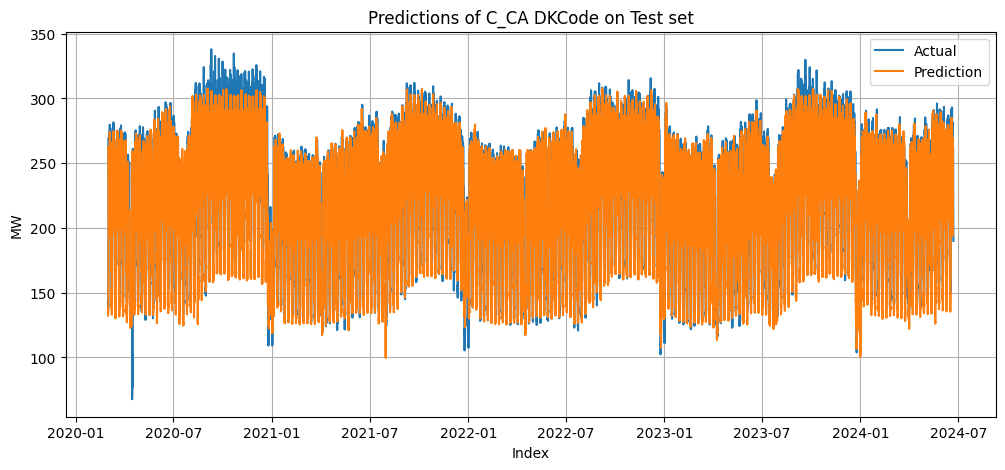

Training RandomForestRegressor model with DKCode:  C_CC


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 2.4876812952733283
Mean Squared Error (MSE): 15.504809736690794
Root Mean Squared Error (RMSE): 3.937614726797277
R-squared (R²): 0.9545243545906527
  DK3619Code       MAE         MSE       RMSE        R2
0        A_A  7.352022  130.351276  11.417148  0.901744
1       C_CA  8.148452  150.362493  12.262239  0.936239
2       C_CC  2.487681   15.504810   3.937615  0.954524
         Feature       A_A      C_CA      C_CC
0   day_of_month  0.000739  0.001673  0.002434
1    day_of_week  0.002963  0.208221  0.364180
2    day_of_year  0.000816  0.009408  0.008115
3        holiday  0.000097  0.015445  0.027979
4           hour  0.000285  0.021737  0.043680
5         lag_24  0.914876  0.638233  0.461370
6         lag_25  0.000513  0.002267  0.004717
7         lag_26  0.000382  0.001547  0.002623
8         lag_27  0.000378  0.001077  0.001926
9         lag_28  0.000361  0.000803  0.001084
10        lag_29  0.000329  0.000758  0.001800
11        lag_30  0.000353  0.001050

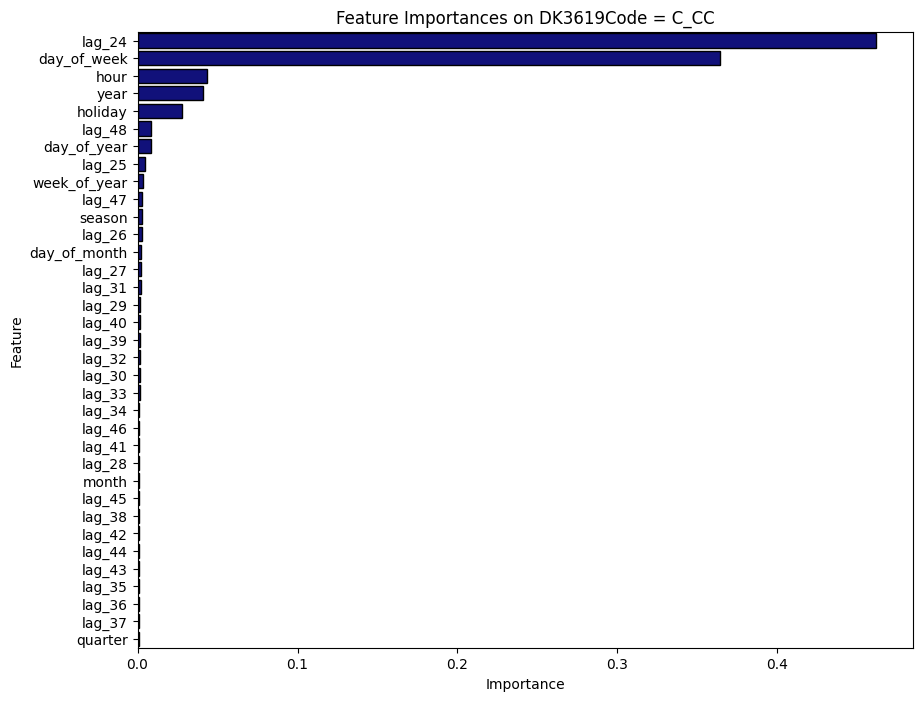

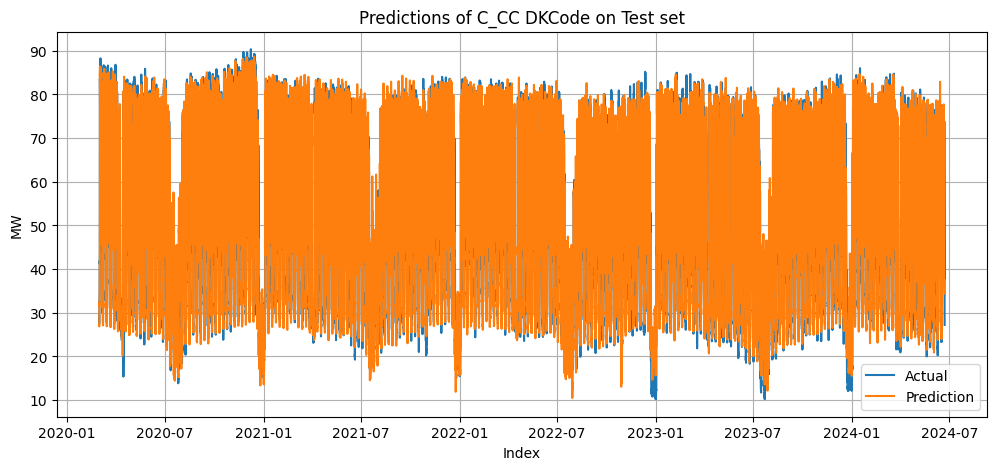

Training RandomForestRegressor model with DKCode:  C_CE_CF_CD


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 6.641994791274127
Mean Squared Error (MSE): 79.30622552152387
Root Mean Squared Error (RMSE): 8.905404287370892
R-squared (R²): 0.6234515583703697
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD
0   day_of_month  0.000739  0.001673  0.002434    0.004960
1    day_of_week  0.002963  0.208221  0.364180    0.052497
2    day_of_year  0.000816  0.009408  0.008115    0.005284
3        holiday  0.000097  0.015445  0.027979    0.002491
4           hour  0.000285  0.021737  0.043680    0.011135
5         lag_24  0.914876  0.638233  0.461370    0.866935
6         lag_25  0.000513  0.002267  0.004717    0.002493
7         lag_26  0.000382  0.001547  0.002623    0.001761
8         

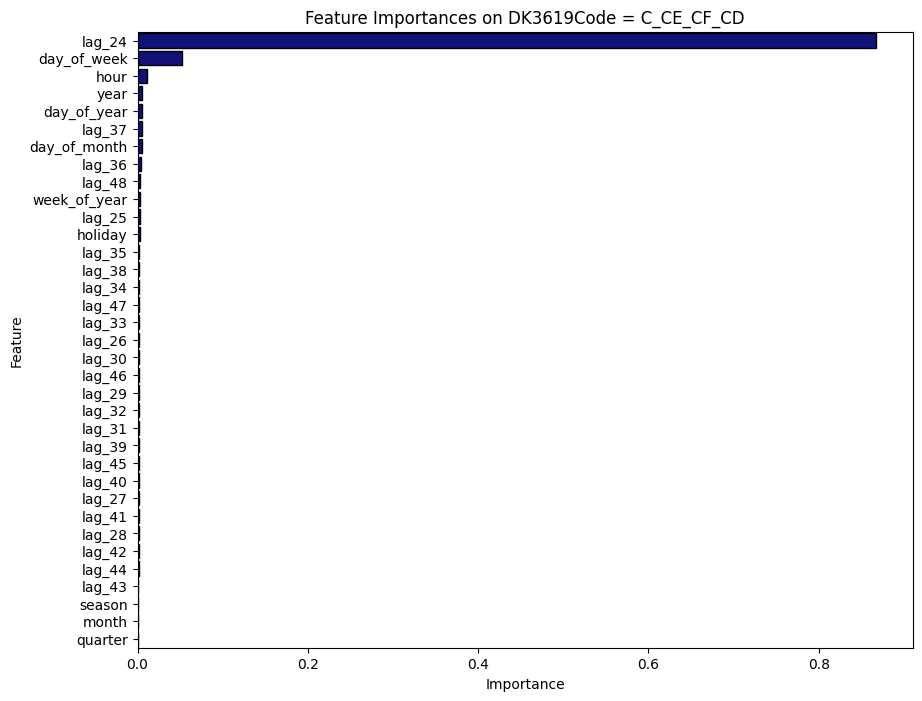

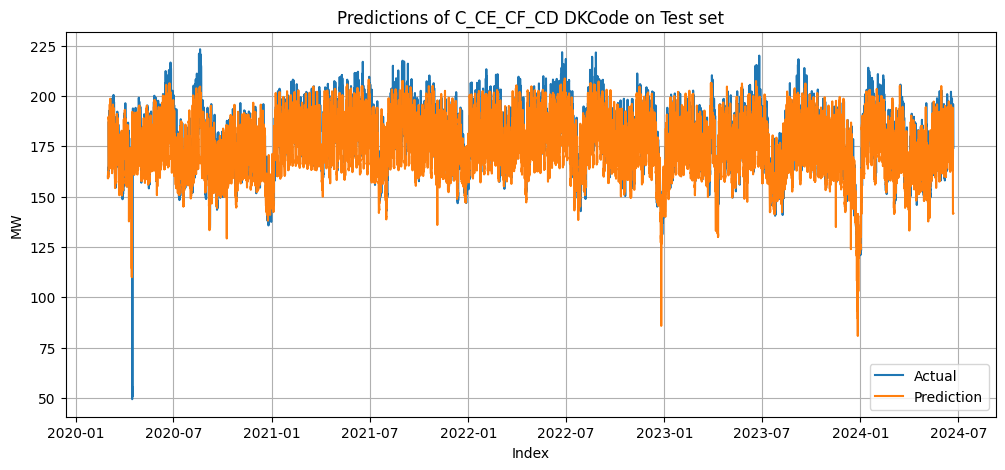

Training RandomForestRegressor model with DKCode:  C_CG


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 8.286622565329711
Mean Squared Error (MSE): 125.03014170506485
Root Mean Squared Error (RMSE): 11.181687784277687
R-squared (R²): 0.8724672617743237
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037
1    day_of_week  0.002963  0.208221  0.364180    0.052497  0.128001
2    day_of_year  0.000816  0.009408  0.008115    0.005284  0.004626
3        holiday  0.000097  0.015445  0.027979    0.002491  0.007469
4           hour  0.000285  0.021737  0.043680    0.011135  0.013309
5         lag_24  0.914876  0.638233  0.461370    0.866935  0.798766

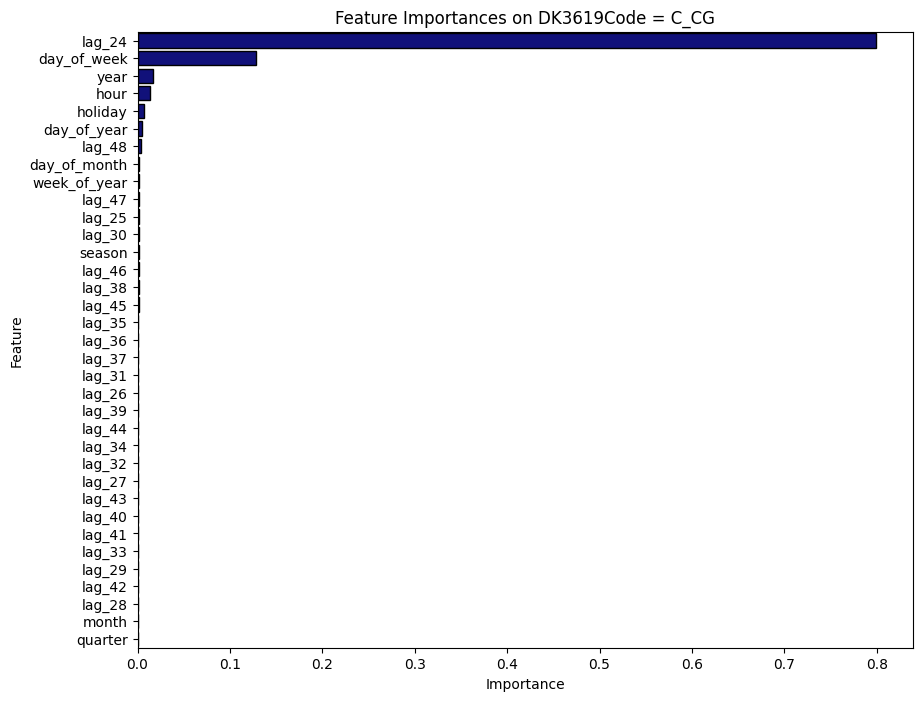

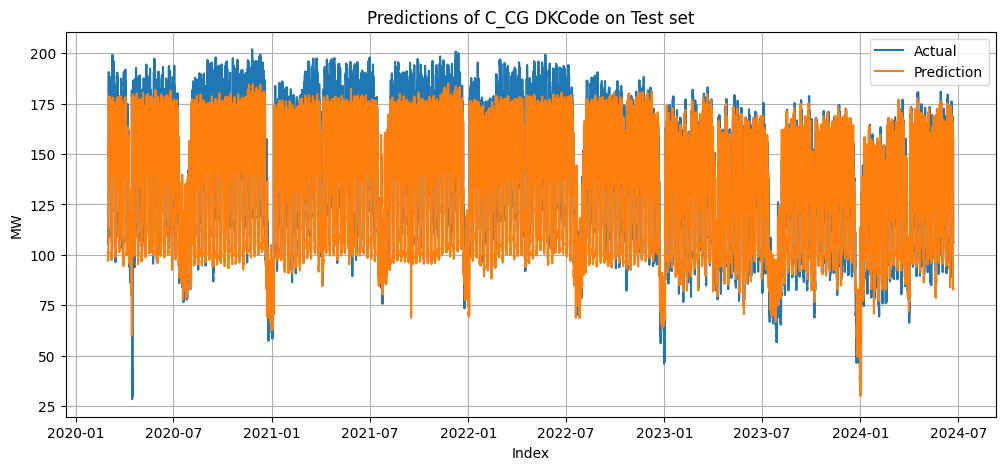

Training RandomForestRegressor model with DKCode:  C_CH


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 4.854749181372071
Mean Squared Error (MSE): 65.93731701789184
Root Mean Squared Error (RMSE): 8.120179617341716
R-squared (R²): 0.9676116694245712
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
5        C_CH  4.854749   65.937317   8.120180  0.967612
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG      C_CH
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037  0.001912
1    day_of_week  0.002963  0.208221  0.364180    0.052497  0.128001  0.280588
2    day_of_year  0.000816  0.009408  0.008115    0.005284  0.004626  0.002173
3        holiday  0.000097  0.015445  0.027979    0.002491  0.007469  0.019398
4           hour  0.000285  0.02

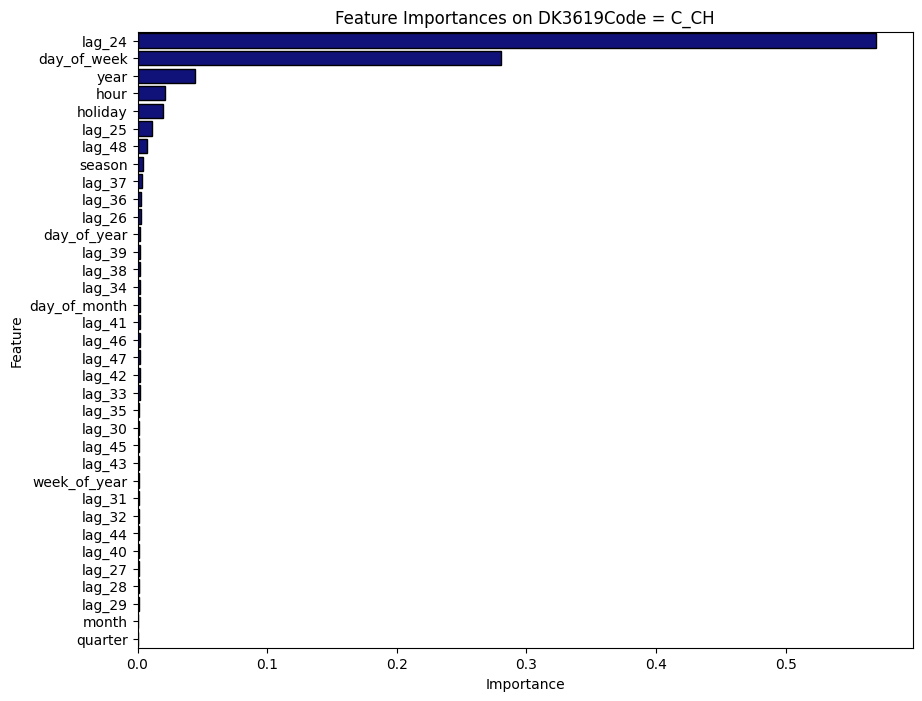

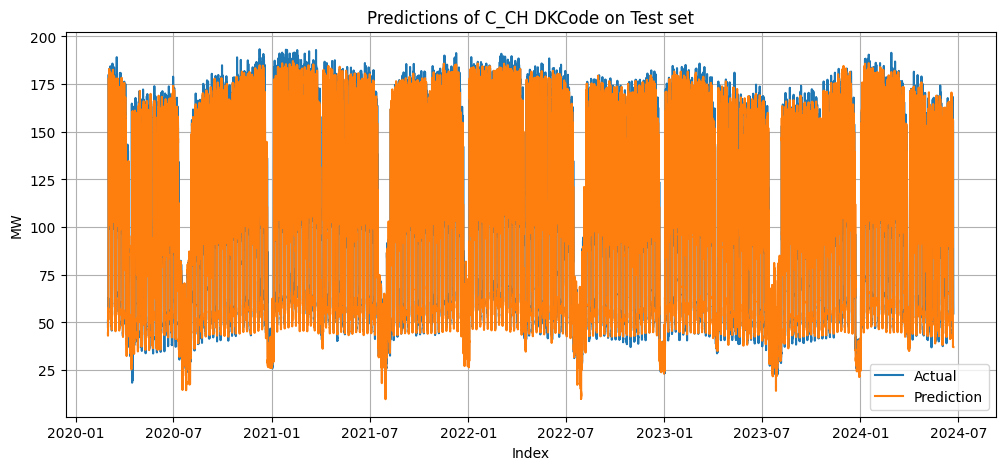

Training RandomForestRegressor model with DKCode:  C_CI


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.3720462096235605
Mean Squared Error (MSE): 0.3535950388212046
Root Mean Squared Error (RMSE): 0.5946385783156055
R-squared (R²): 0.9521857253634463
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
5        C_CH  4.854749   65.937317   8.120180  0.967612
6        C_CI  0.372046    0.353595   0.594639  0.952186
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG  \
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037   
1    day_of_week  0.002963  0.208221  0.364180    0.052497  0.128001   
2    day_of_year  0.000816  0.009408  0.008115    0.005284  0.004626   
3        holiday  0.000097  0.015445  0.027979    0.002491  0.007469   
4      

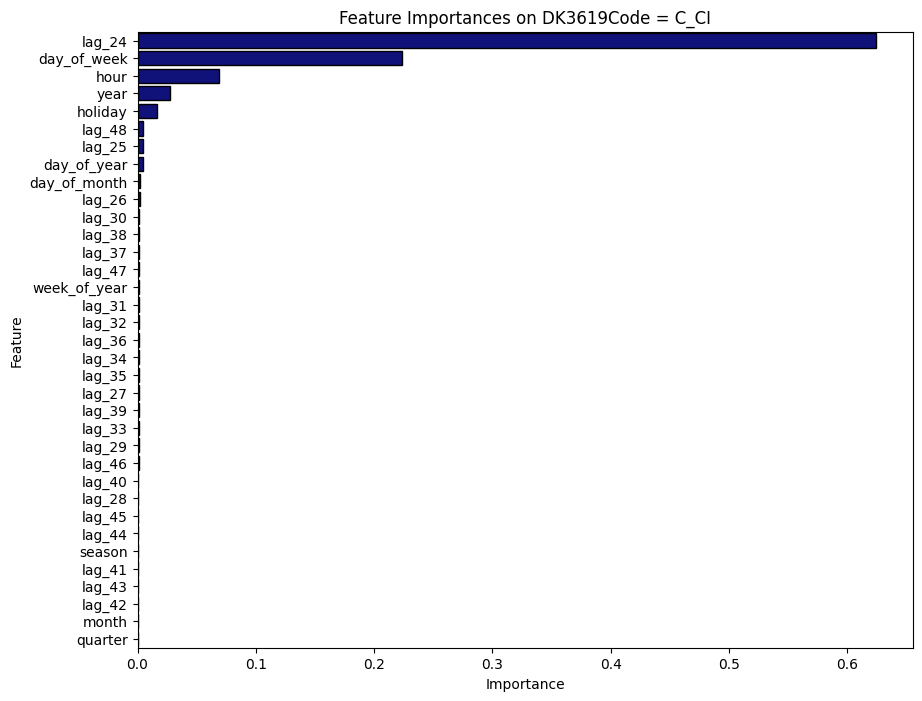

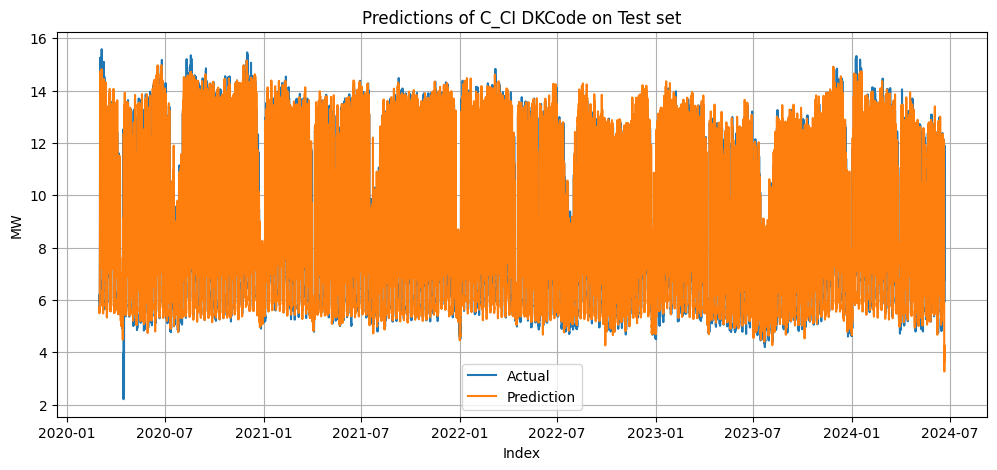

Training RandomForestRegressor model with DKCode:  C_CJ


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.48127494745493044
Mean Squared Error (MSE): 0.5854949349894113
Root Mean Squared Error (RMSE): 0.7651764077579831
R-squared (R²): 0.963250652767461
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
5        C_CH  4.854749   65.937317   8.120180  0.967612
6        C_CI  0.372046    0.353595   0.594639  0.952186
7        C_CJ  0.481275    0.585495   0.765176  0.963251
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG  \
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037   
1    day_of_week  0.002963  0.208221  0.364180    0.052497  0.128001   
2    day_of_year  0.000816  0.009408  0.008115    0.005284  0.004626   
3        holiday  0.00

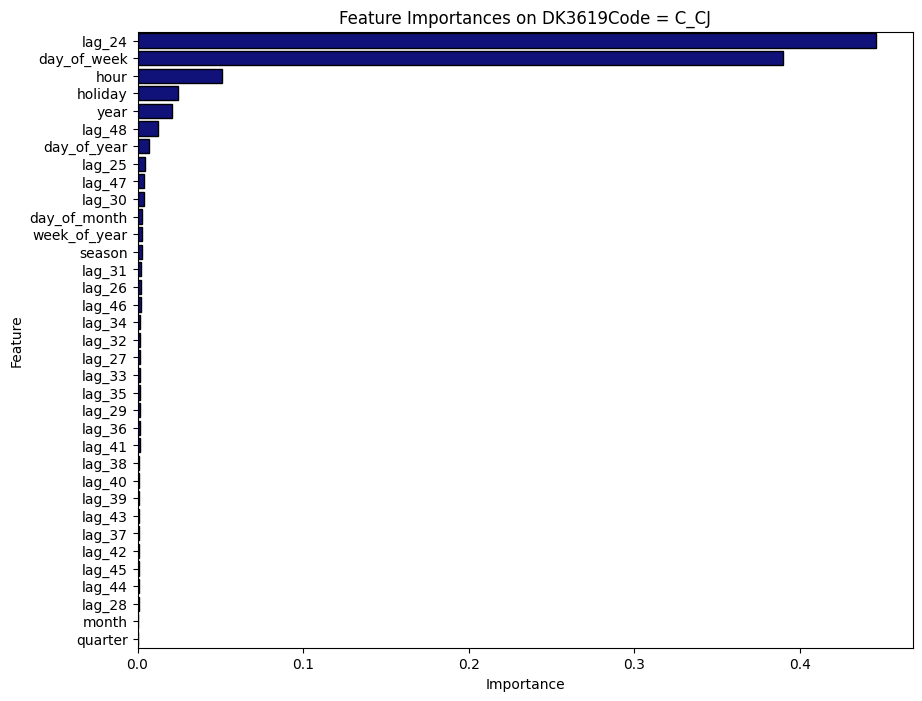

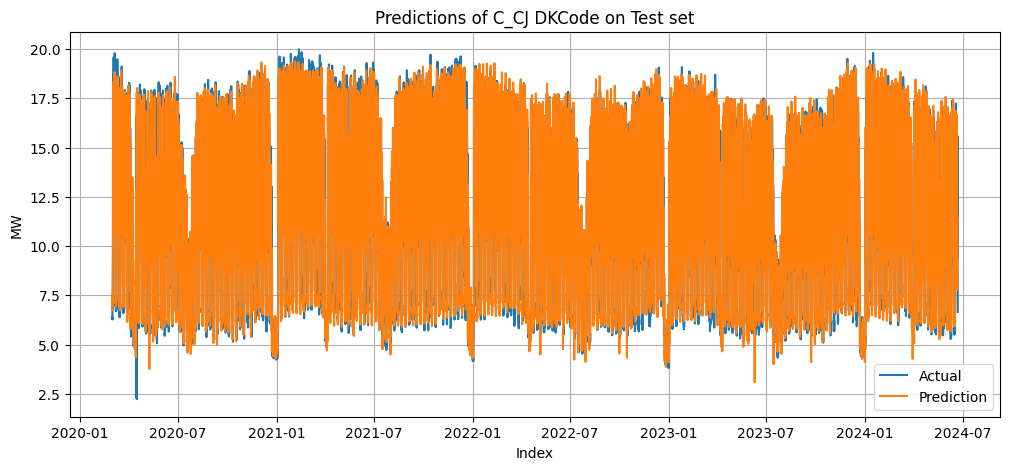

Training RandomForestRegressor model with DKCode:  C_CK


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 2.3878254488968893
Mean Squared Error (MSE): 17.702354387056683
Root Mean Squared Error (RMSE): 4.207416593000589
R-squared (R²): 0.9633877279481099
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
5        C_CH  4.854749   65.937317   8.120180  0.967612
6        C_CI  0.372046    0.353595   0.594639  0.952186
7        C_CJ  0.481275    0.585495   0.765176  0.963251
8        C_CK  2.387825   17.702354   4.207417  0.963388
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG  \
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037   
1    day_of_week  0.002963  0.208221  0.364180    0.052497  0.128001   
2    day_of_year  0.000816  0.009408  

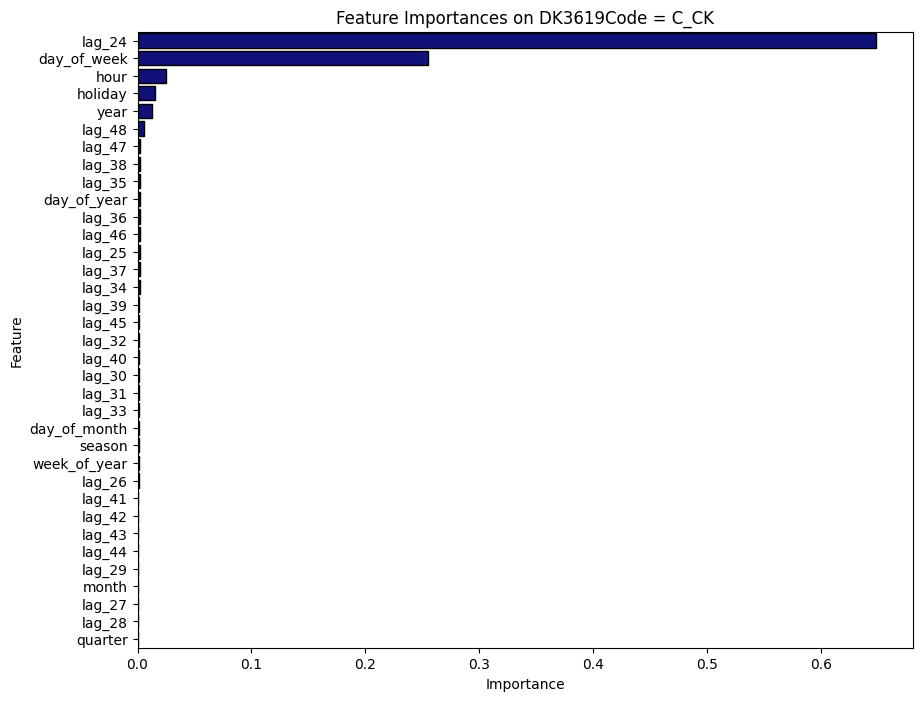

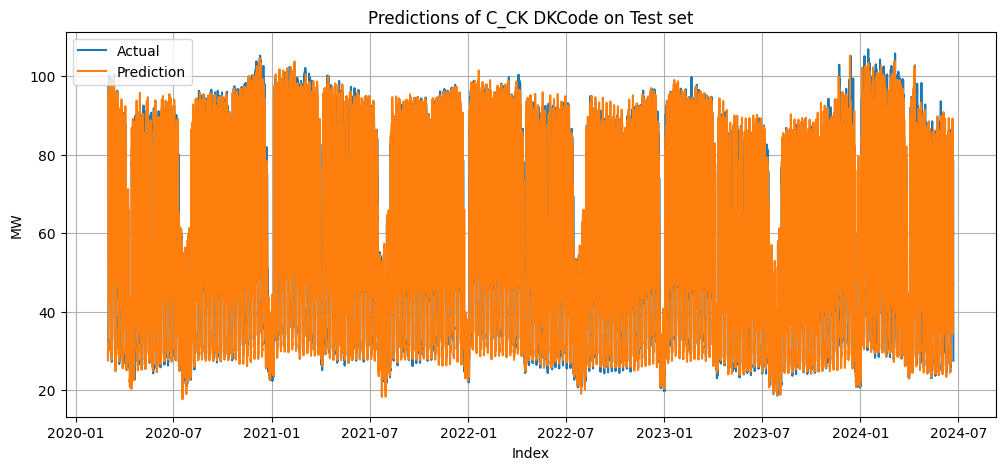

Training RandomForestRegressor model with DKCode:  C_CL


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.5532339298374584
Mean Squared Error (MSE): 0.7348355627583281
Root Mean Squared Error (RMSE): 0.8572255028627696
R-squared (R²): 0.9474265323180098
   DK3619Code       MAE         MSE       RMSE        R2
0         A_A  7.352022  130.351276  11.417148  0.901744
1        C_CA  8.148452  150.362493  12.262239  0.936239
2        C_CC  2.487681   15.504810   3.937615  0.954524
3  C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4        C_CG  8.286623  125.030142  11.181688  0.872467
5        C_CH  4.854749   65.937317   8.120180  0.967612
6        C_CI  0.372046    0.353595   0.594639  0.952186
7        C_CJ  0.481275    0.585495   0.765176  0.963251
8        C_CK  2.387825   17.702354   4.207417  0.963388
9        C_CL  0.553234    0.734836   0.857226  0.947427
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG  \
0   day_of_month  0.000739  0.001673  0.002434    0.004960  0.002037   
1    day_of_week  0.002963  0.208221  0.364180    0.

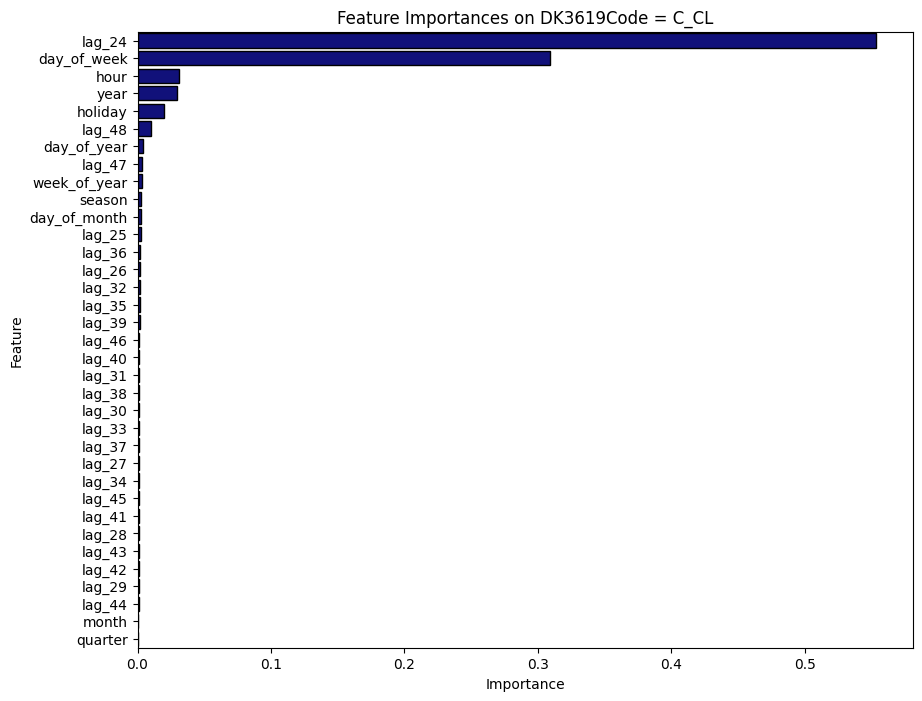

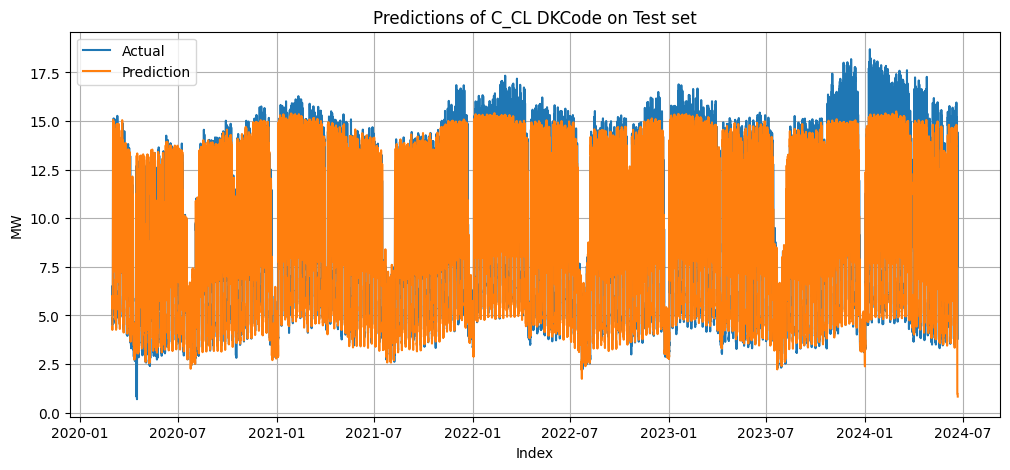

Training RandomForestRegressor model with DKCode:  C_CM_CB


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.9092802508225013
Mean Squared Error (MSE): 9.598710144059458
Root Mean Squared Error (RMSE): 3.098178520366355
R-squared (R²): 0.9657215775047506
    DK3619Code       MAE         MSE       RMSE        R2
0          A_A  7.352022  130.351276  11.417148  0.901744
1         C_CA  8.148452  150.362493  12.262239  0.936239
2         C_CC  2.487681   15.504810   3.937615  0.954524
3   C_CE_CF_CD  6.641995   79.306226   8.905404  0.623452
4         C_CG  8.286623  125.030142  11.181688  0.872467
5         C_CH  4.854749   65.937317   8.120180  0.967612
6         C_CI  0.372046    0.353595   0.594639  0.952186
7         C_CJ  0.481275    0.585495   0.765176  0.963251
8         C_CK  2.387825   17.702354   4.207417  0.963388
9         C_CL  0.553234    0.734836   0.857226  0.947427
10     C_CM_CB  1.909280    9.598710   3.098179  0.965722
         Feature       A_A      C_CA      C_CC  C_CE_CF_CD      C_CG  \
0   day_of_month  0.000739  0.001673  0.002434    0.00496

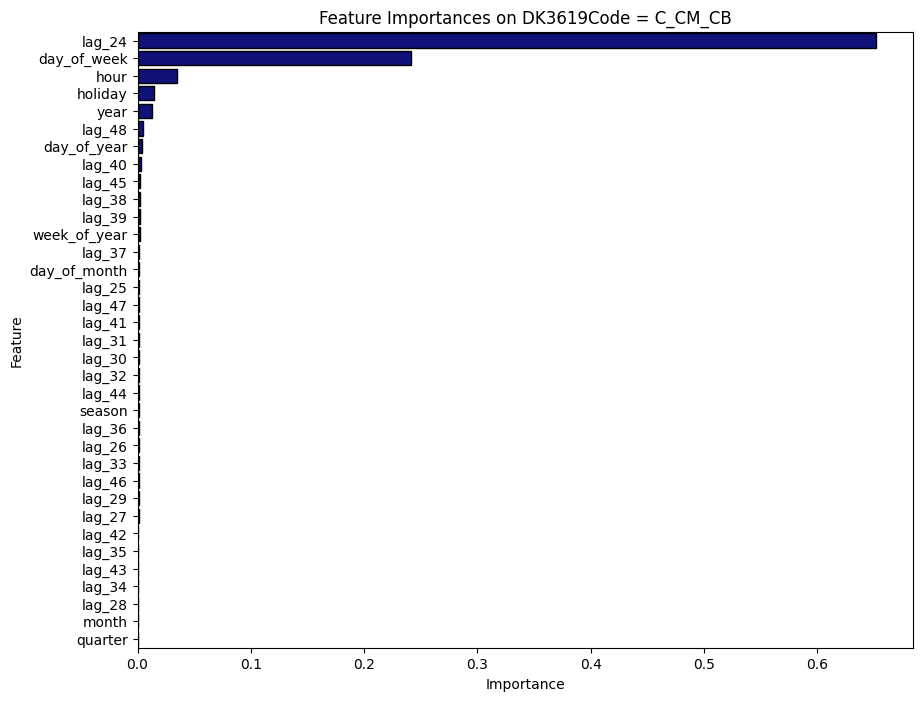

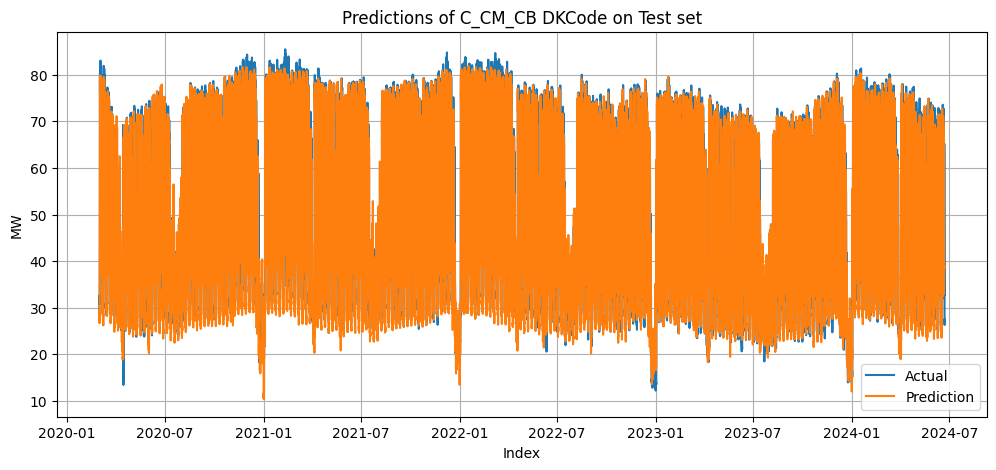

Training RandomForestRegressor model with DKCode:  D_D


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 125.88712341826286
Mean Squared Error (MSE): 47041.19454755265
Root Mean Squared Error (RMSE): 216.88982121702404
R-squared (R²): 0.014620612445506831
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
   

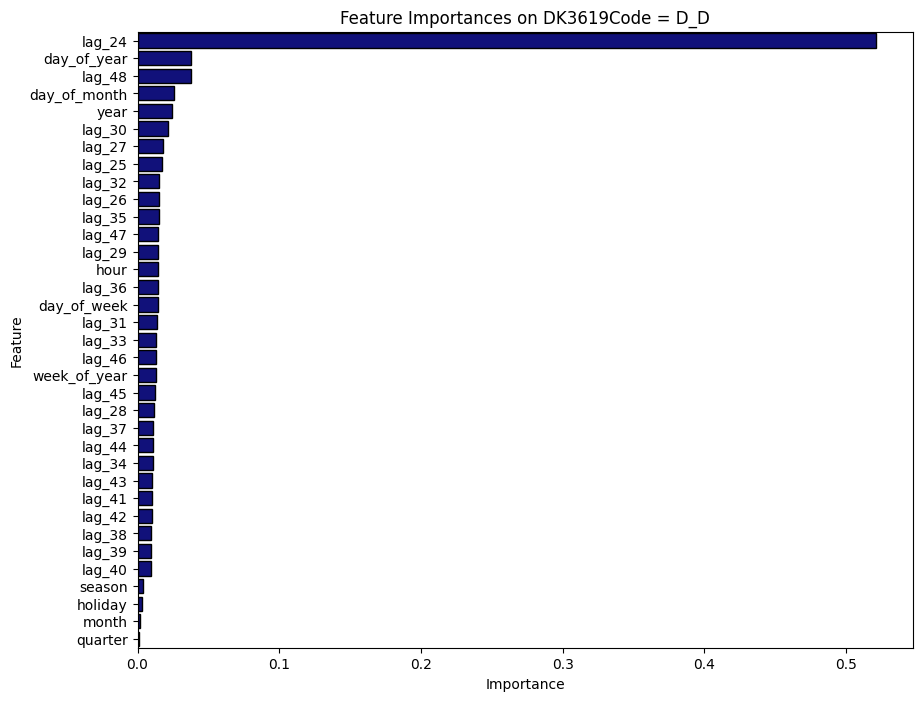

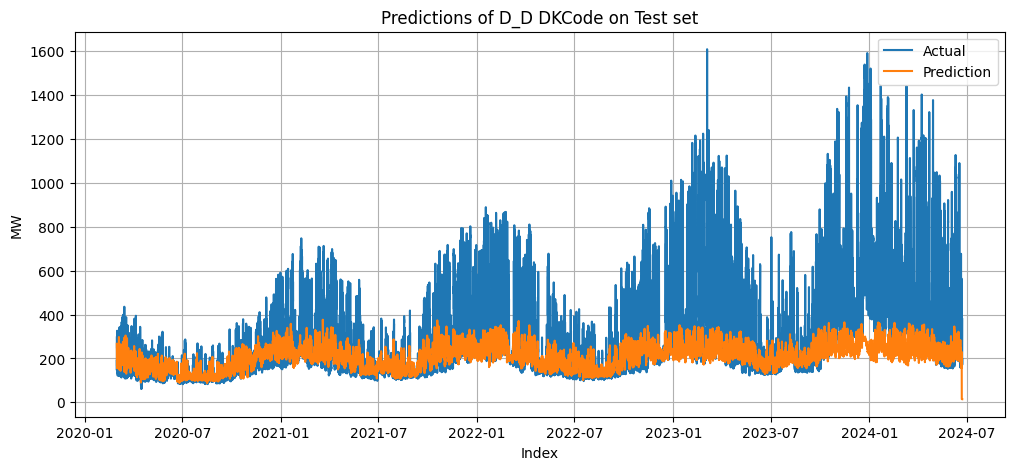

Training RandomForestRegressor model with DKCode:  E_E


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 6.475949714459298
Mean Squared Error (MSE): 112.99382149607567
Root Mean Squared Error (RMSE): 10.629855196383236
R-squared (R²): 0.6218036809141714
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

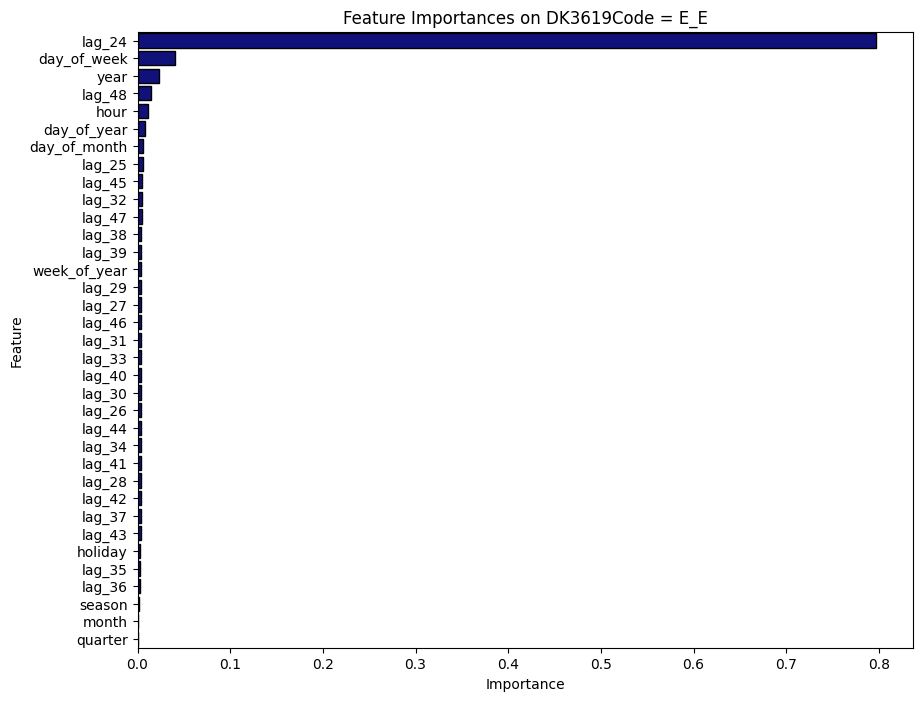

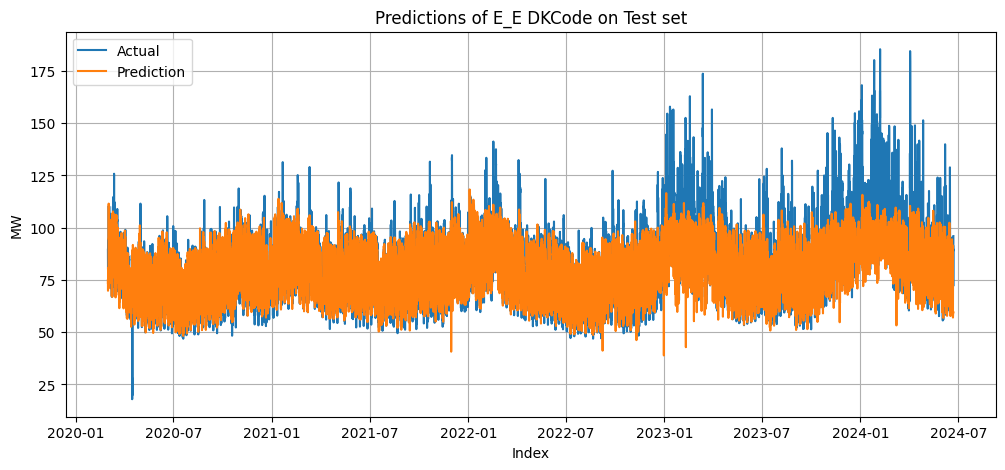

Training RandomForestRegressor model with DKCode:  F_F


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 2.5188069642263384
Mean Squared Error (MSE): 21.243784274702275
Root Mean Squared Error (RMSE): 4.609097989271032
R-squared (R²): 0.9057897843848073
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

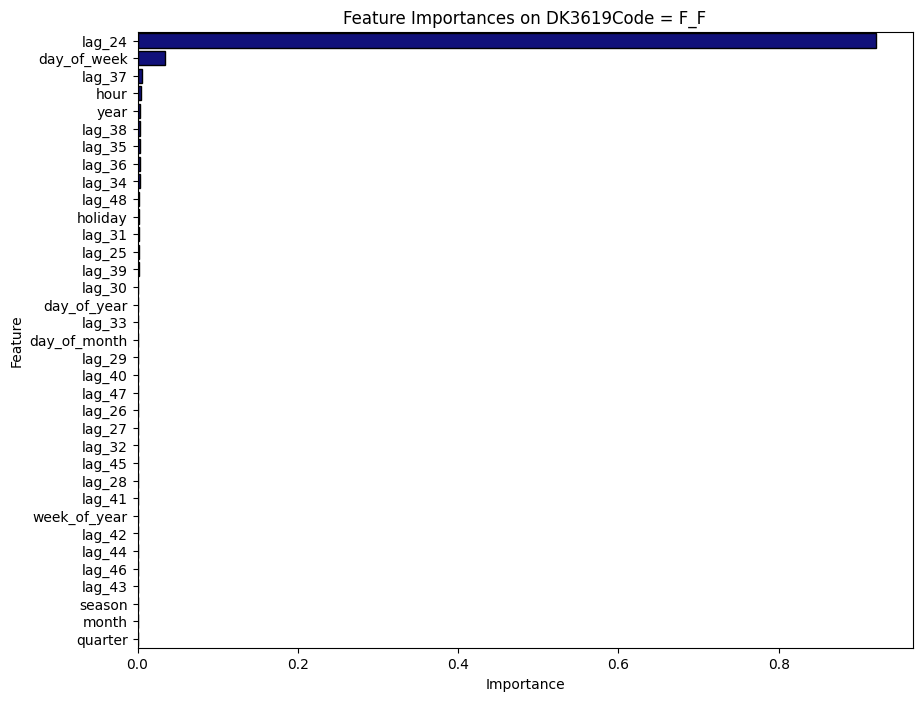

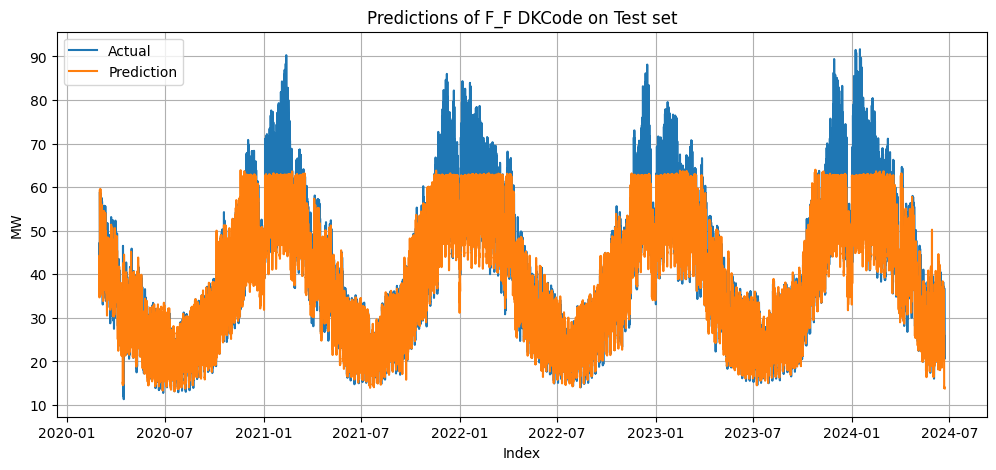

Training RandomForestRegressor model with DKCode:  G_G


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 9.712345047624881
Mean Squared Error (MSE): 362.2800265368159
Root Mean Squared Error (RMSE): 19.033655101866692
R-squared (R²): 0.9595464643746279
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

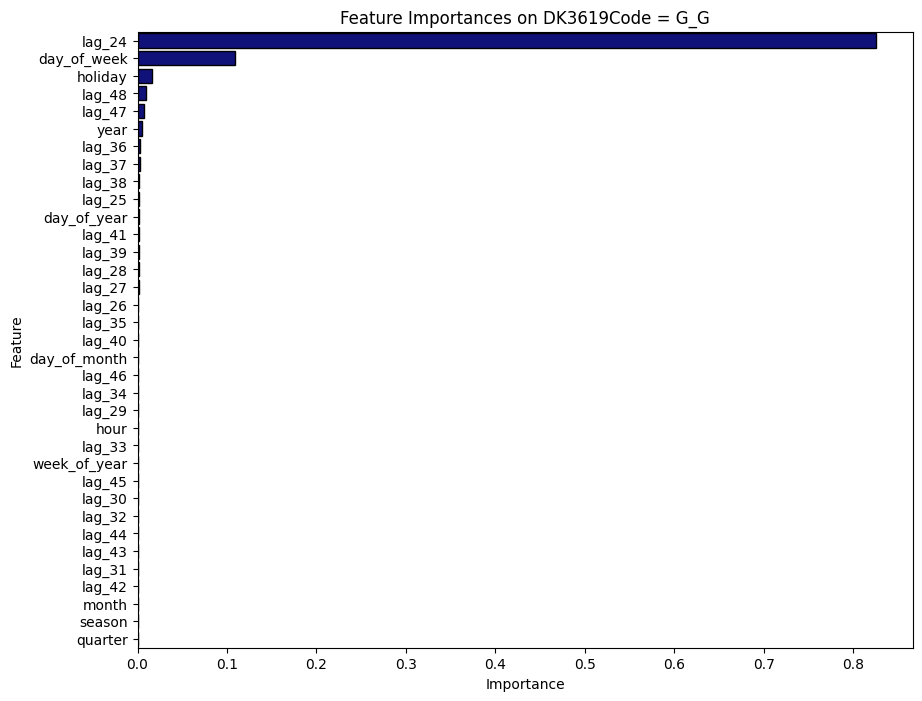

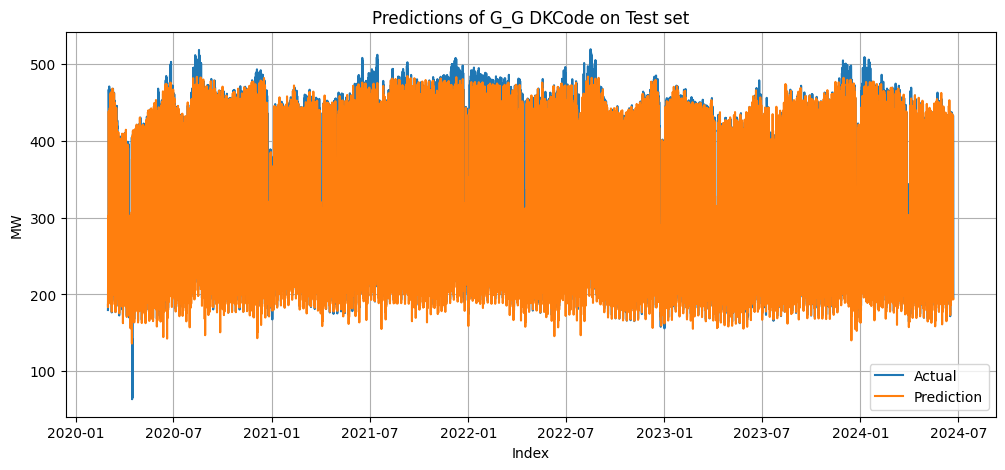

Training RandomForestRegressor model with DKCode:  H_H


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 7.602826920917542
Mean Squared Error (MSE): 137.76704553991883
Root Mean Squared Error (RMSE): 11.737420736257128
R-squared (R²): 0.8001449185665105
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

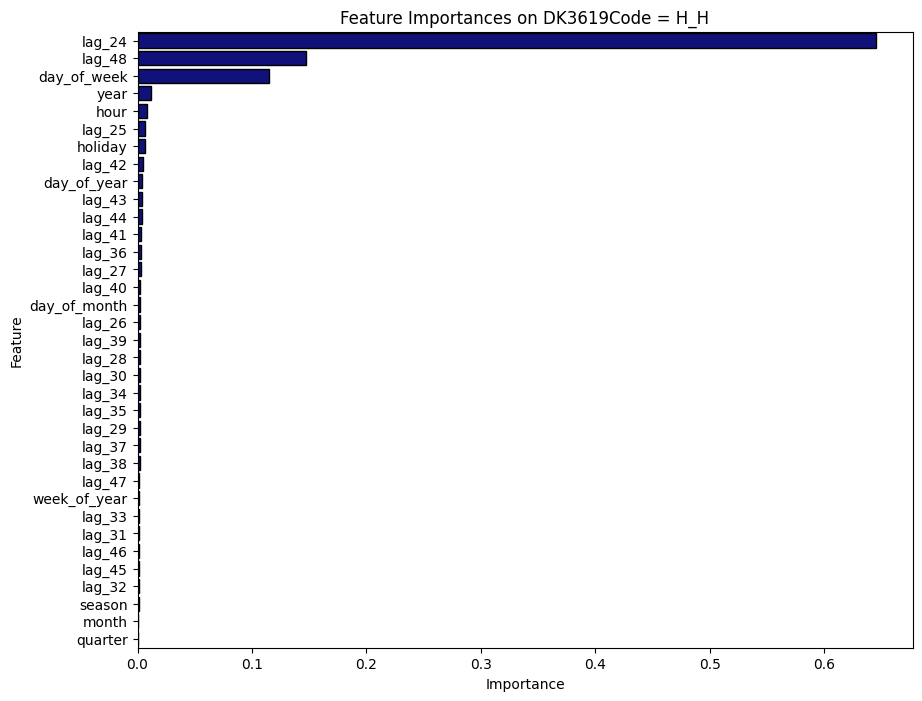

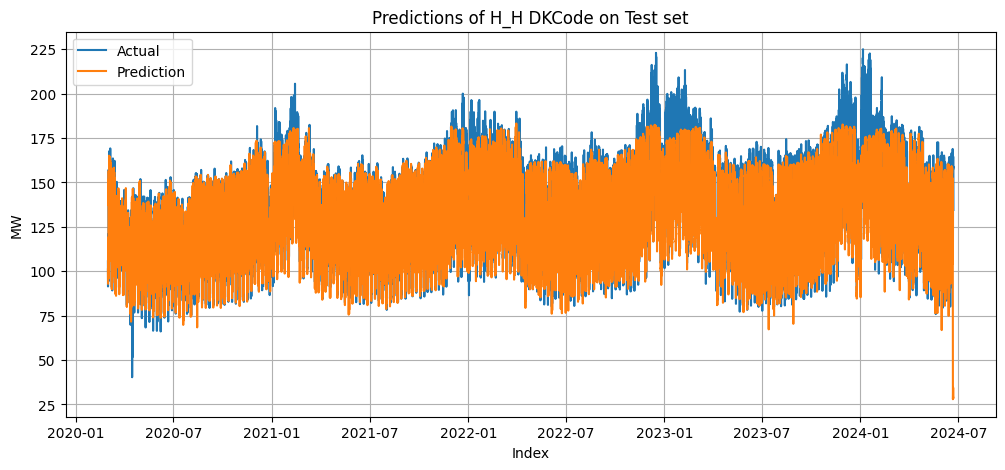

Training RandomForestRegressor model with DKCode:  I_I


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 9.09351444934163
Mean Squared Error (MSE): 274.97084133397834
Root Mean Squared Error (RMSE): 16.582244761611086
R-squared (R²): 0.6839275365865871
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

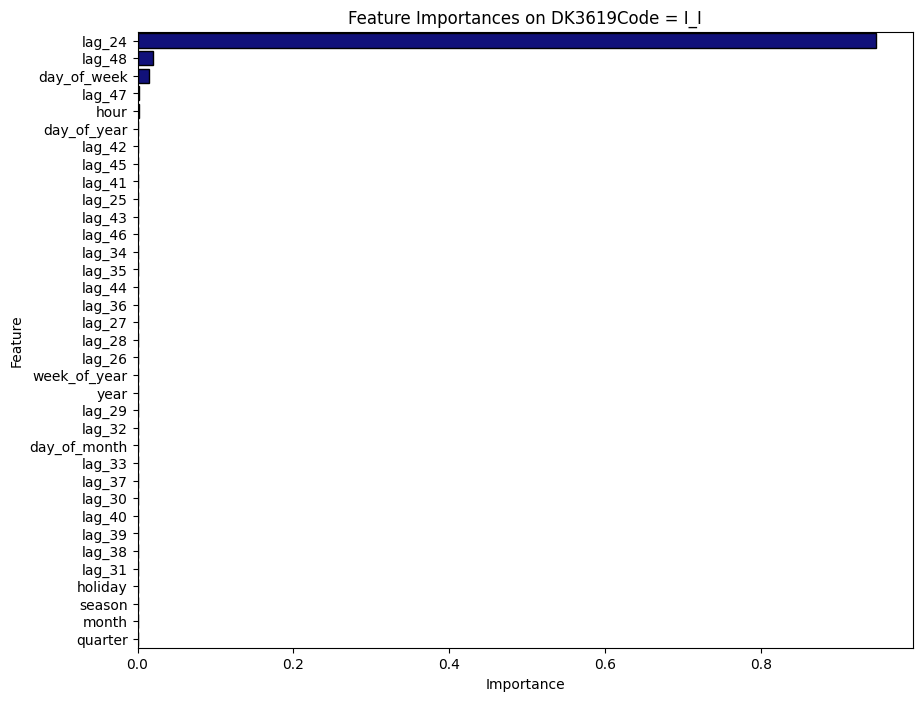

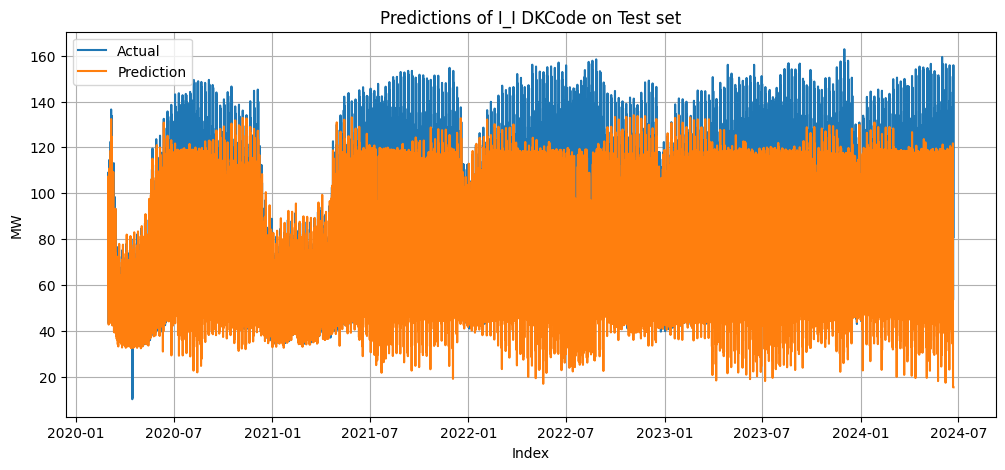

Training RandomForestRegressor model with DKCode:  J_JA


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.356462730226605
Mean Squared Error (MSE): 0.35269496120081184
Root Mean Squared Error (RMSE): 0.593881268605781
R-squared (R²): 0.9366652878888834
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

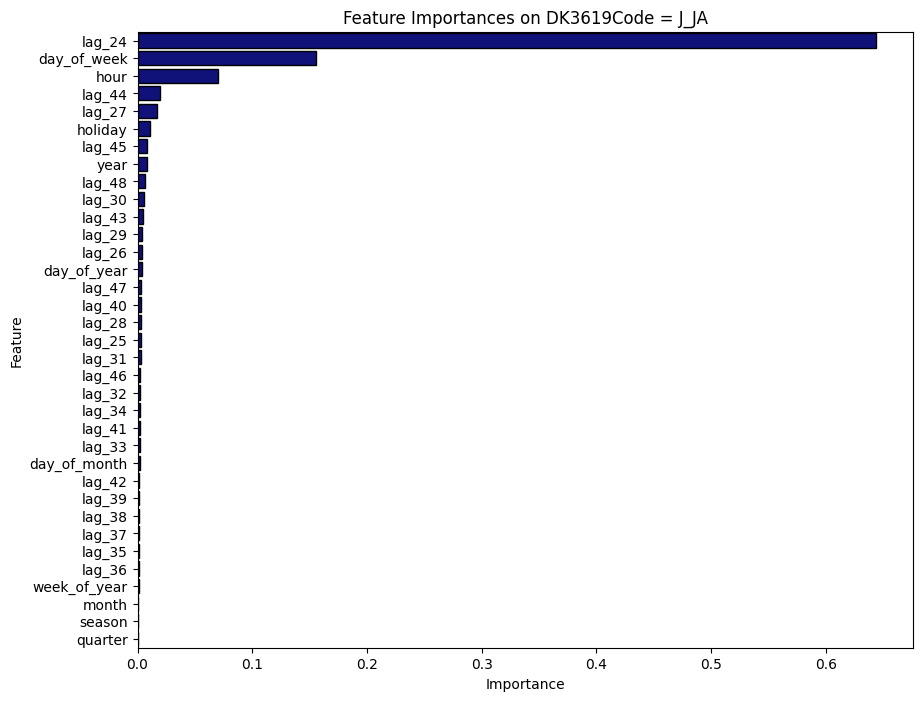

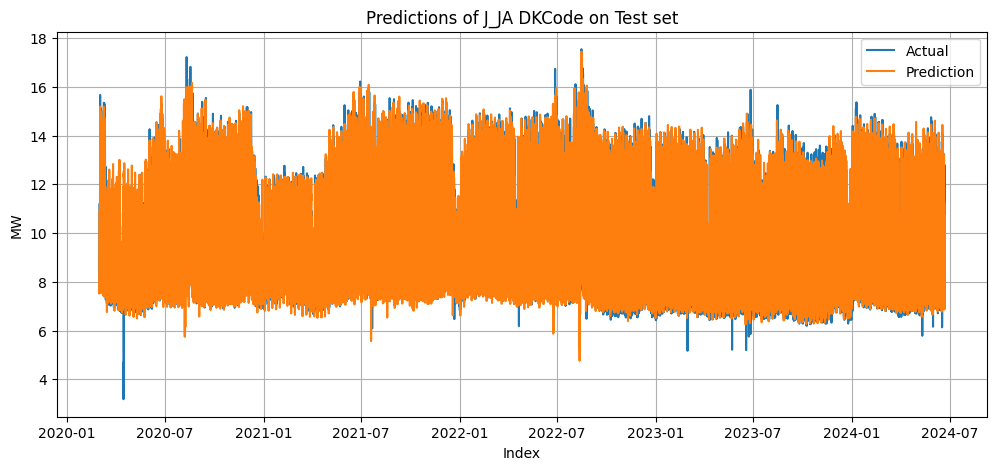

Training RandomForestRegressor model with DKCode:  J_JB_JC


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 27.99674852496543
Mean Squared Error (MSE): 1123.1365313319407
Root Mean Squared Error (RMSE): 33.51322919880955
R-squared (R²): -3.394595783841373
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

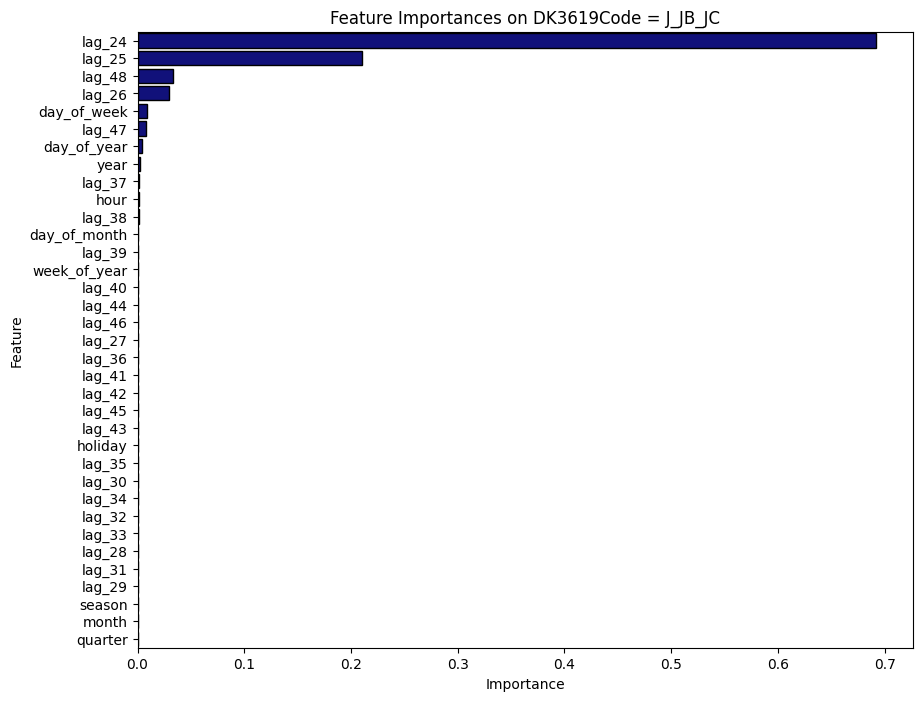

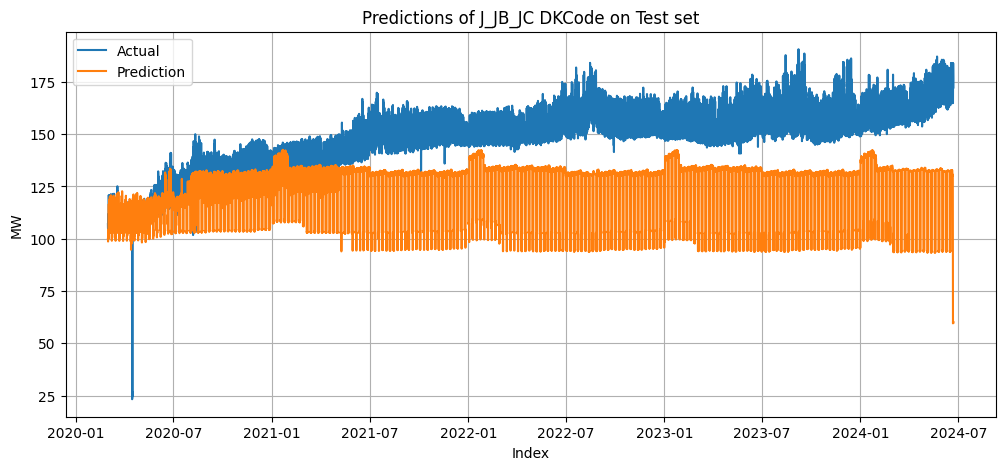

Training RandomForestRegressor model with DKCode:  K_K


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.6898166370811385
Mean Squared Error (MSE): 9.326114216245115
Root Mean Squared Error (RMSE): 3.053868729373467
R-squared (R²): 0.8874468950342903
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

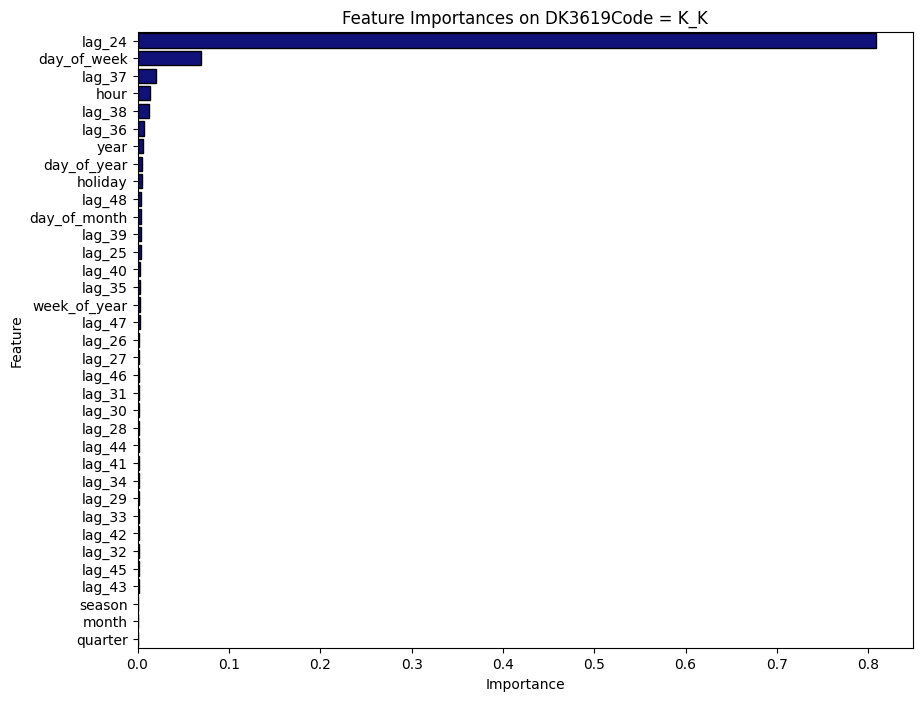

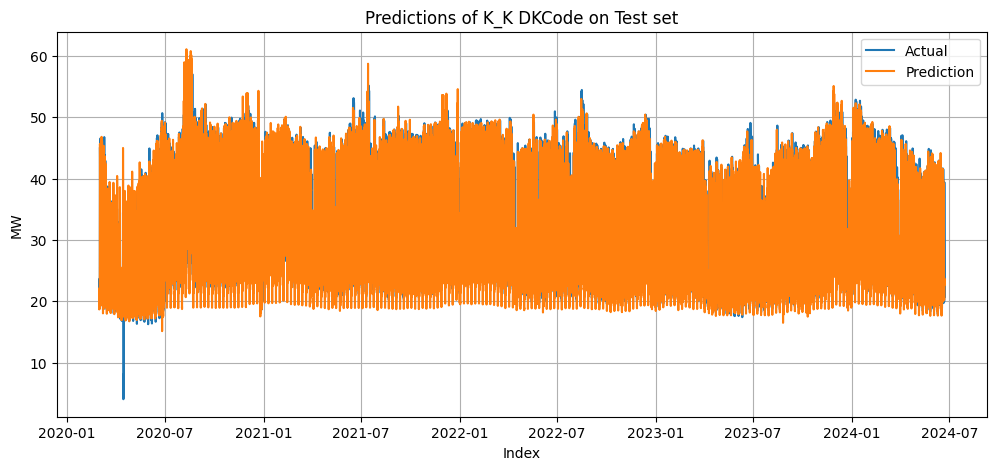

Training RandomForestRegressor model with DKCode:  L_L


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 6.6079859510589
Mean Squared Error (MSE): 117.49947515295203
Root Mean Squared Error (RMSE): 10.839717484923305
R-squared (R²): 0.9143490286280203
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12     

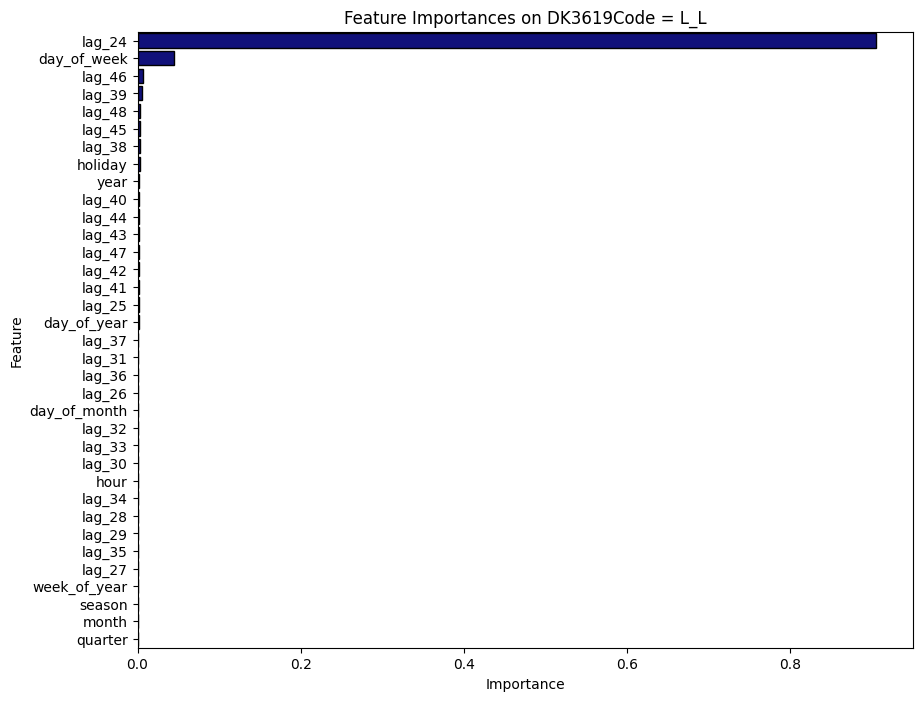

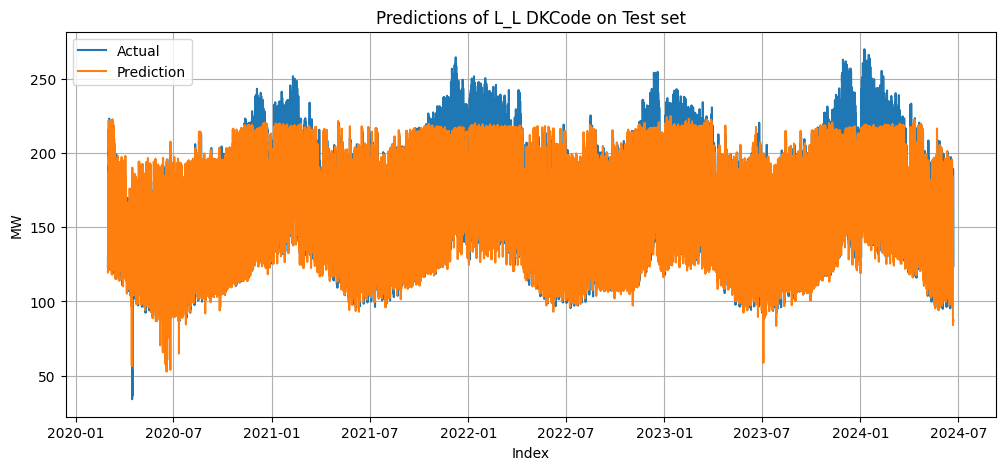

Training RandomForestRegressor model with DKCode:  M_MA


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 2.5596311515904695
Mean Squared Error (MSE): 18.974600773386978
Root Mean Squared Error (RMSE): 4.355984478092981
R-squared (R²): 0.7869147907557814
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

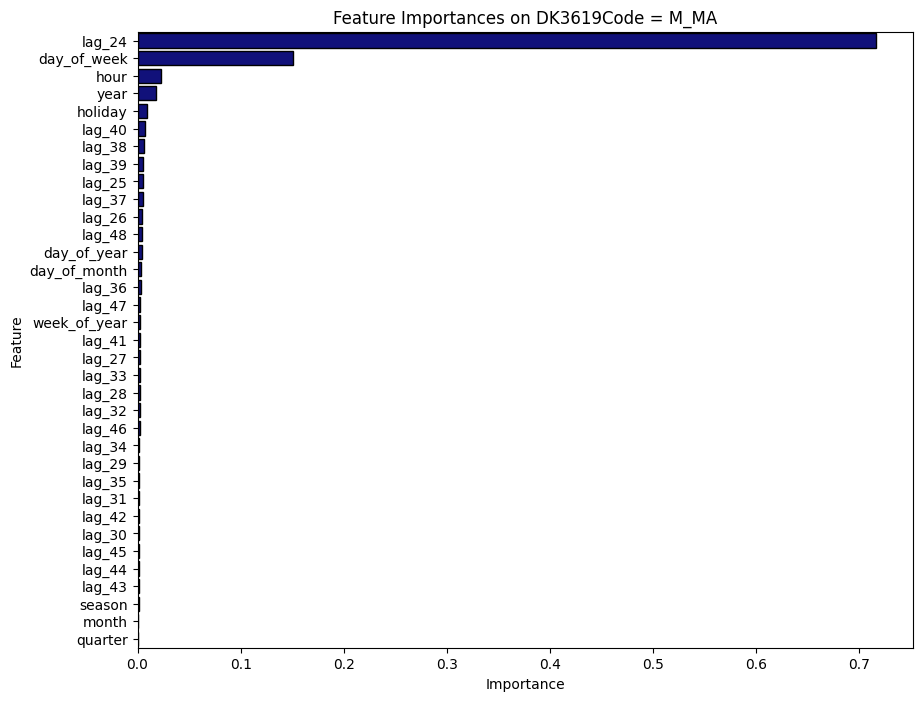

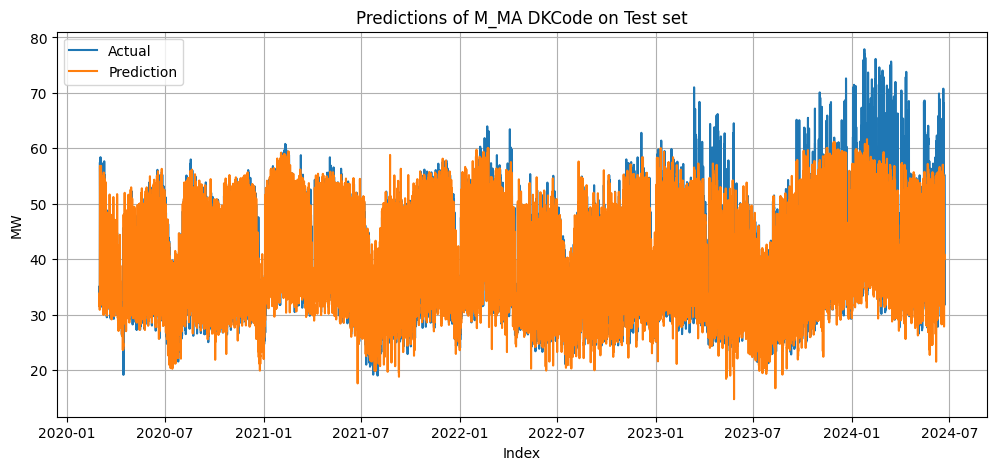

Training RandomForestRegressor model with DKCode:  M_MB


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.059980584522303
Mean Squared Error (MSE): 2.699473656567247
Root Mean Squared Error (RMSE): 1.6430075035030263
R-squared (R²): 0.8082393497836874
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

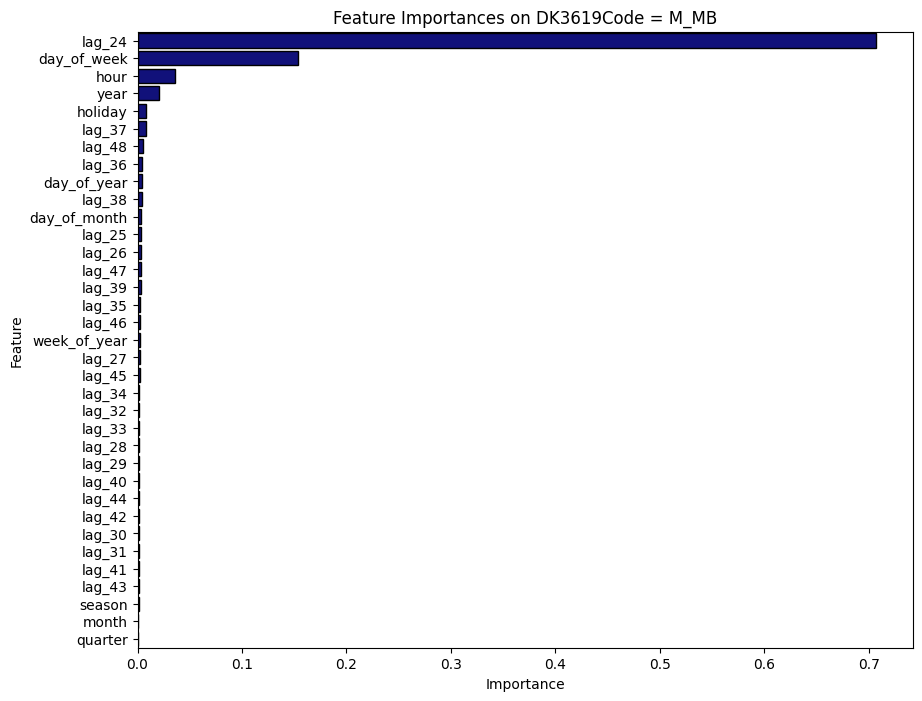

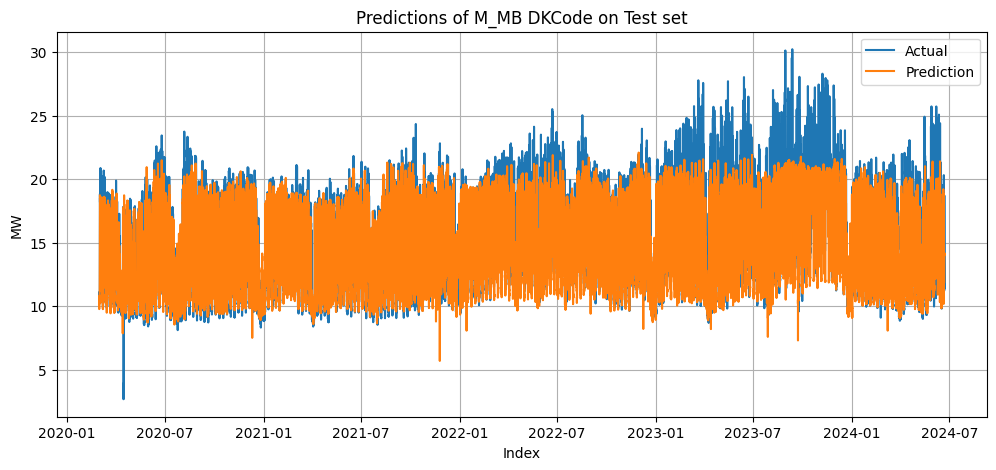

Training RandomForestRegressor model with DKCode:  M_MC


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.21075071732627398
Mean Squared Error (MSE): 0.3115942839192834
Root Mean Squared Error (RMSE): 0.5582063094585042
R-squared (R²): 0.9084205584482002
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12 

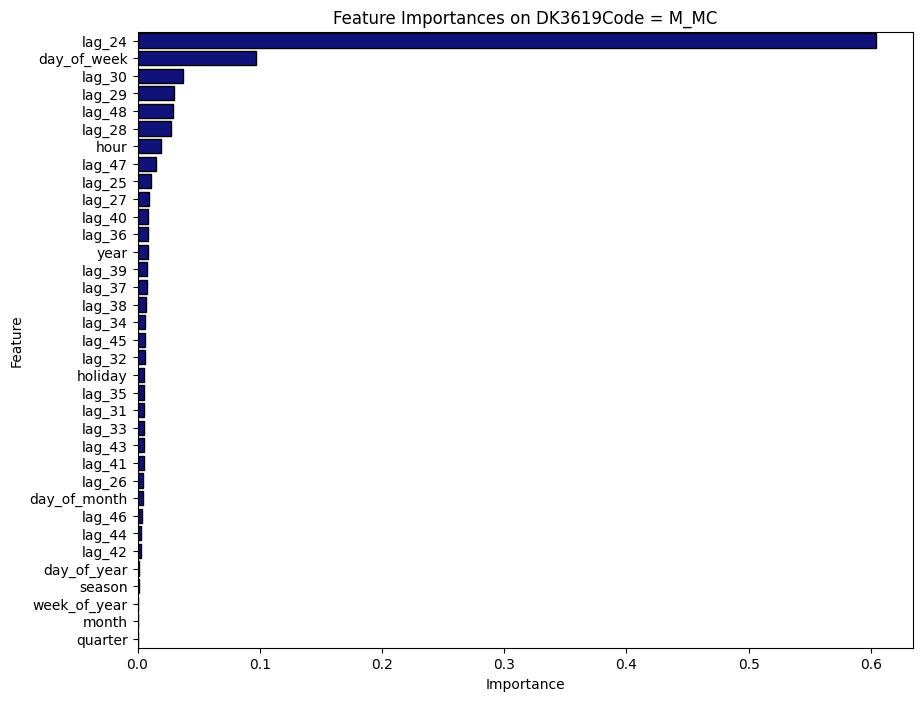

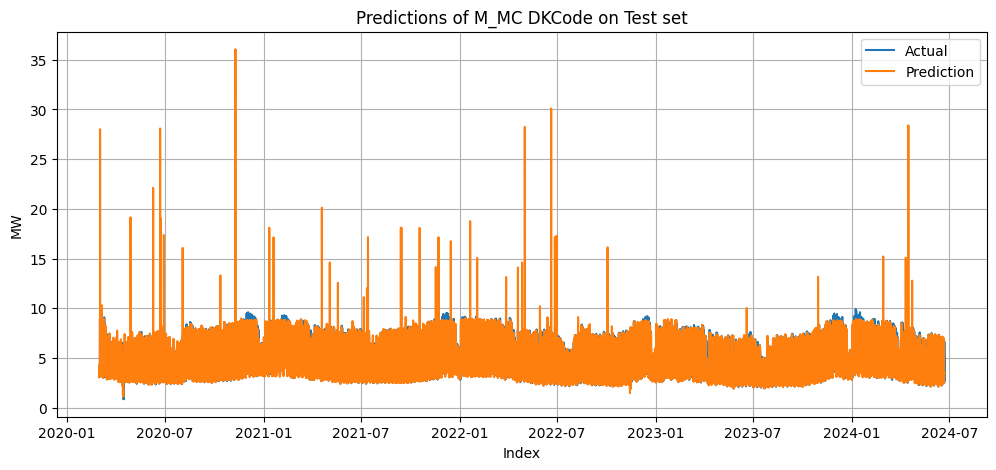

Training RandomForestRegressor model with DKCode:  N_N


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.271502737361218
Mean Squared Error (MSE): 9.356385398991055
Root Mean Squared Error (RMSE): 3.0588209164629196
R-squared (R²): 0.8468802329997456
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

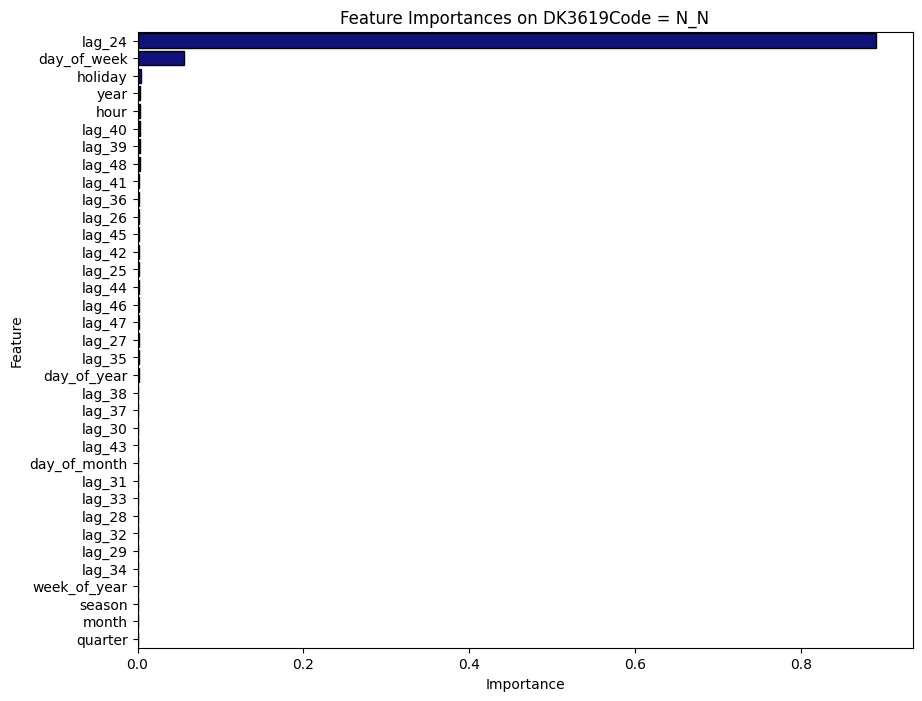

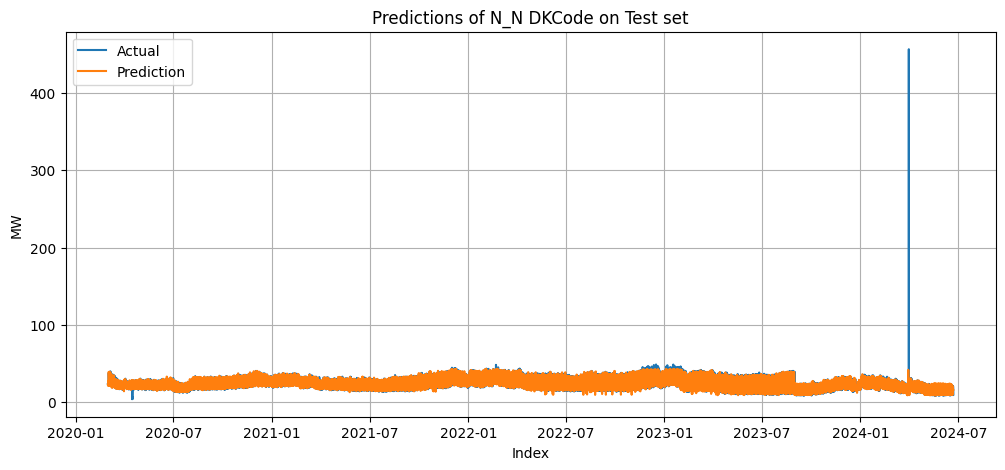

Training RandomForestRegressor model with DKCode:  O_O


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 6.106769230806089
Mean Squared Error (MSE): 120.3789725557296
Root Mean Squared Error (RMSE): 10.971735166131637
R-squared (R²): 0.9519415772406526
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

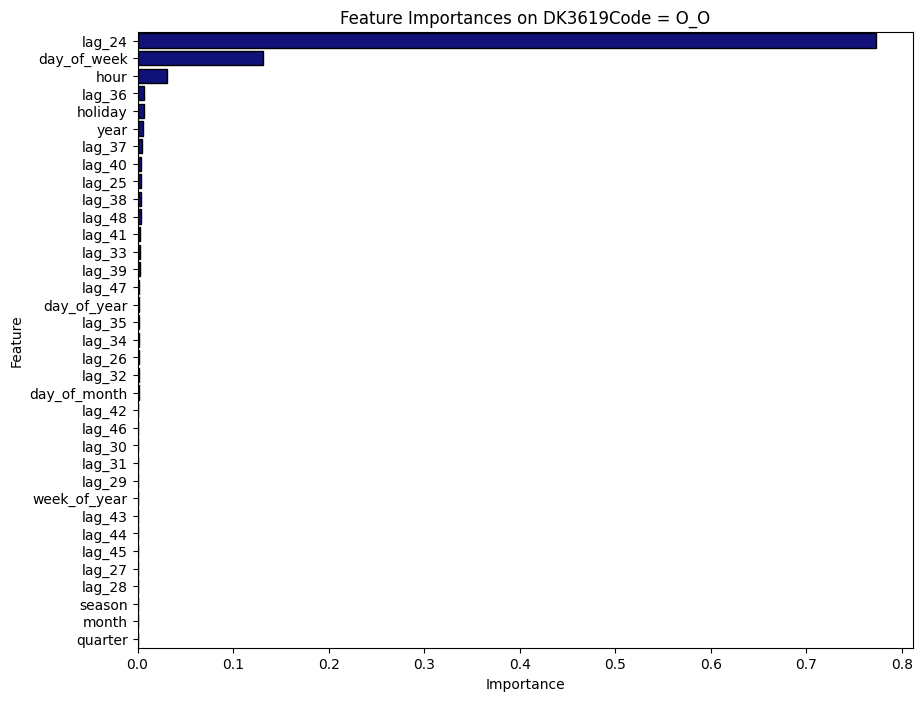

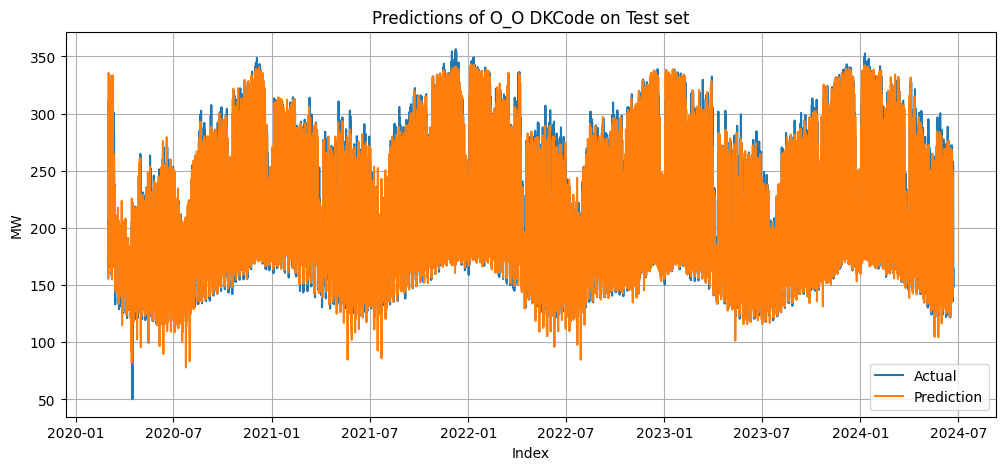

Training RandomForestRegressor model with DKCode:  PR_PR


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 58.881863854139766
Mean Squared Error (MSE): 8018.578413538469
Root Mean Squared Error (RMSE): 89.54651536234377
R-squared (R²): 0.9302170253596491
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

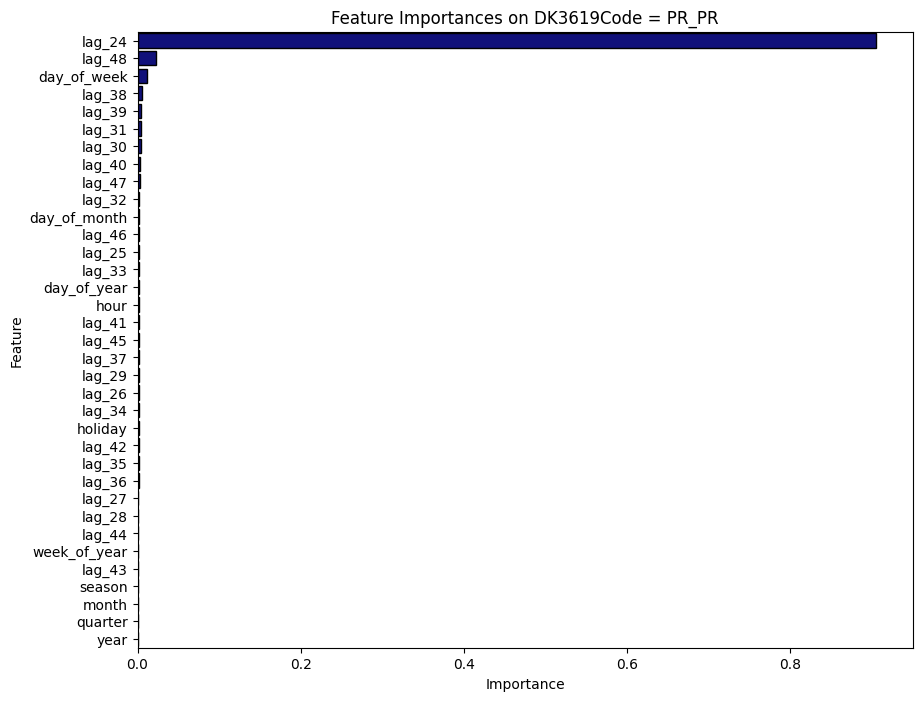

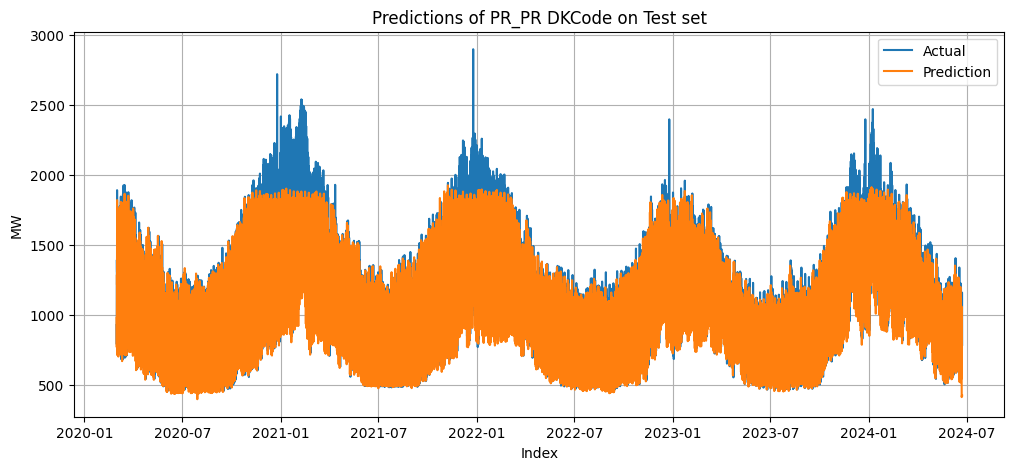

Training RandomForestRegressor model with DKCode:  P_P


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 2.0042777911430836
Mean Squared Error (MSE): 16.922786379205753
Root Mean Squared Error (RMSE): 4.113731442280324
R-squared (R²): 0.9606008112863433
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

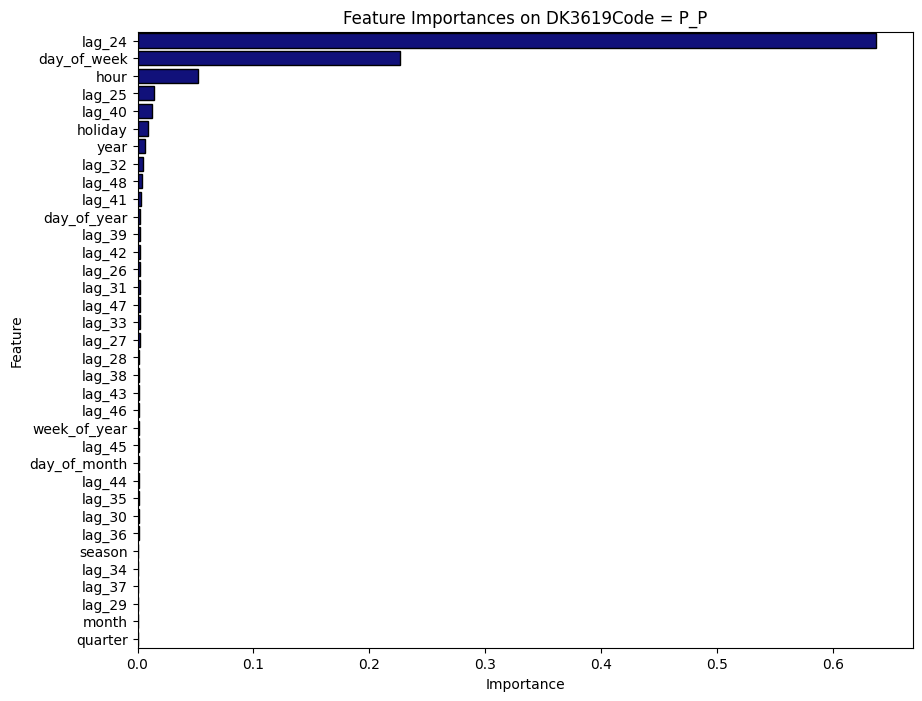

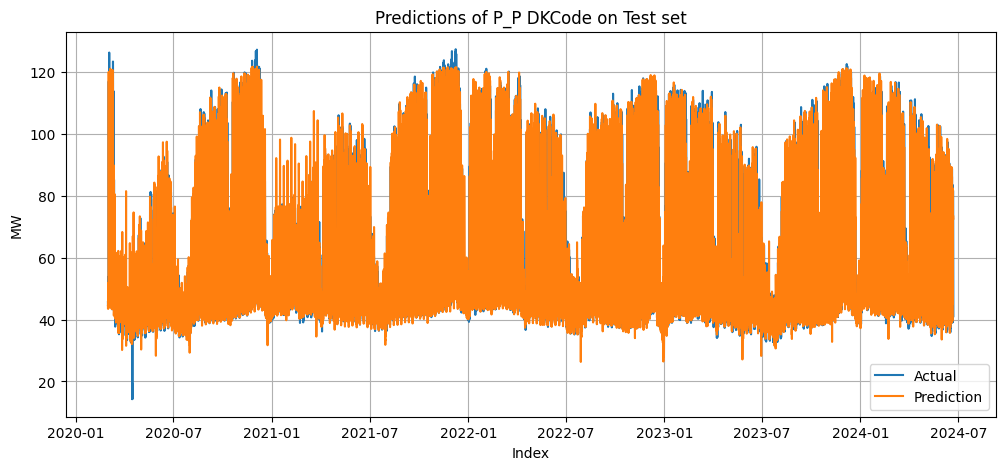

Training RandomForestRegressor model with DKCode:  Q_QA


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.5474044599340837
Mean Squared Error (MSE): 1.0362318235402013
Root Mean Squared Error (RMSE): 1.017954725682926
R-squared (R²): 0.9402364071509042
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

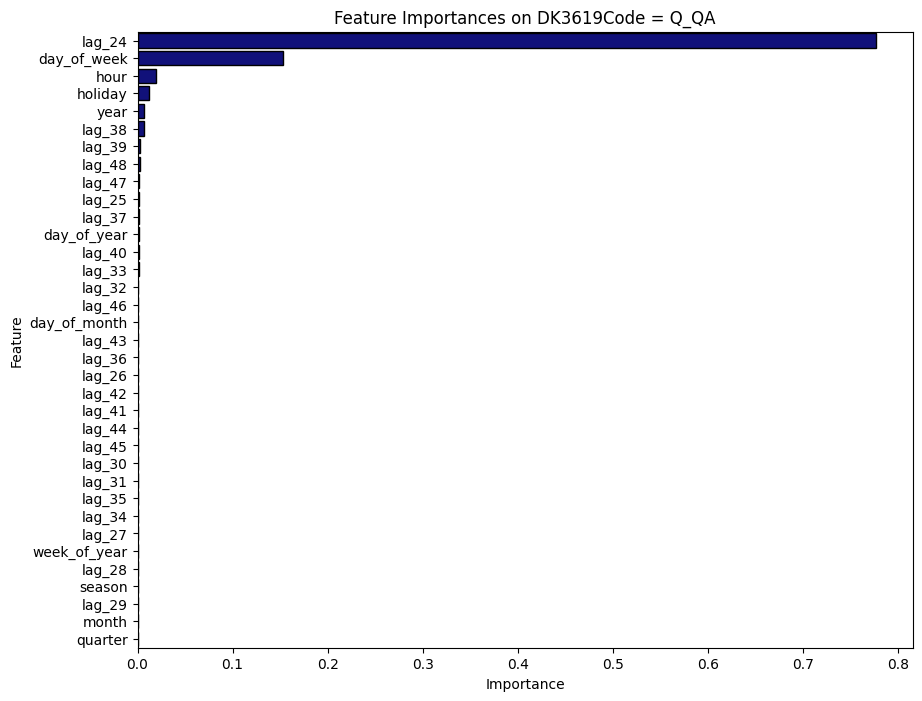

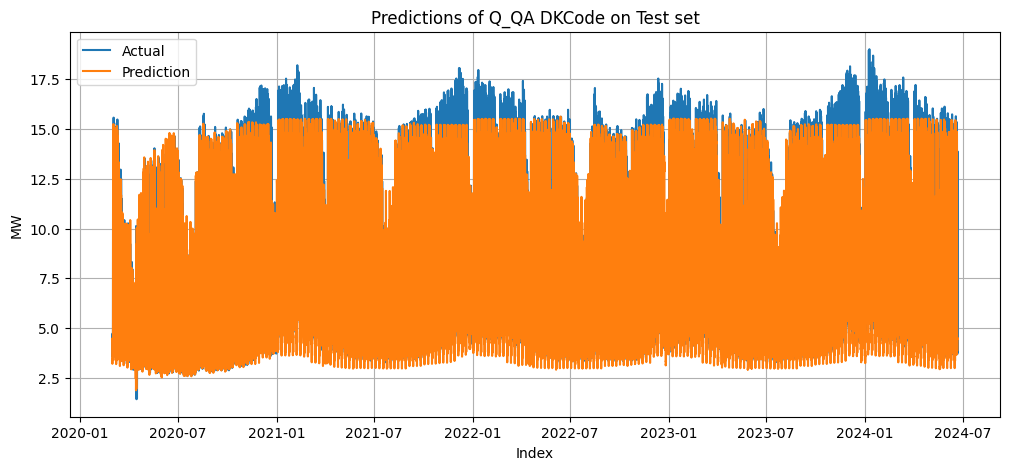

Training RandomForestRegressor model with DKCode:  Q_QB


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 0.6698535538075447
Mean Squared Error (MSE): 1.458280704528632
Root Mean Squared Error (RMSE): 1.2075929382571893
R-squared (R²): 0.8984634760392971
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12   

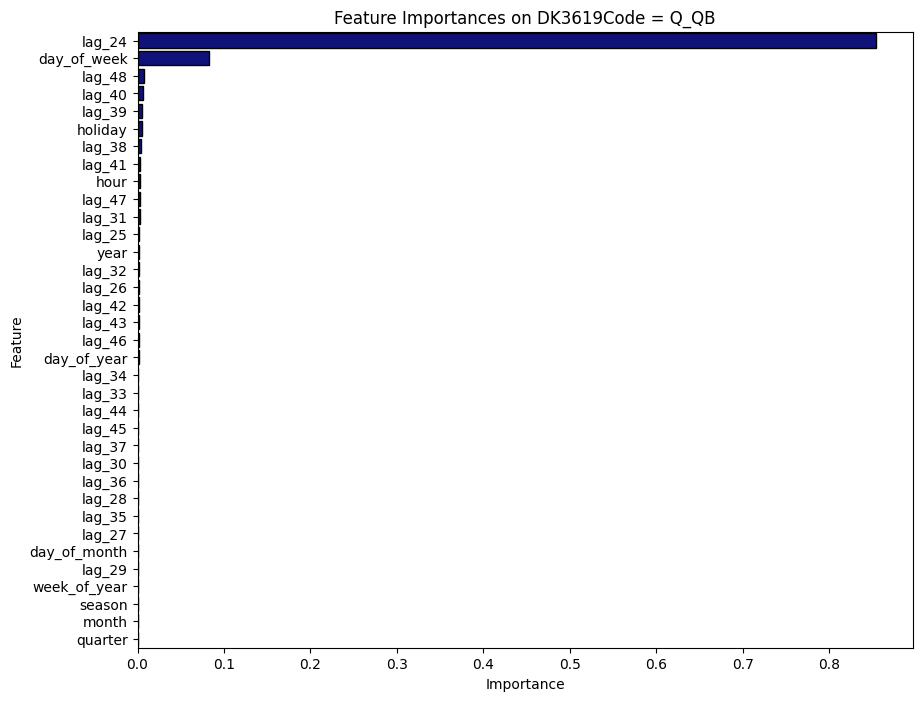

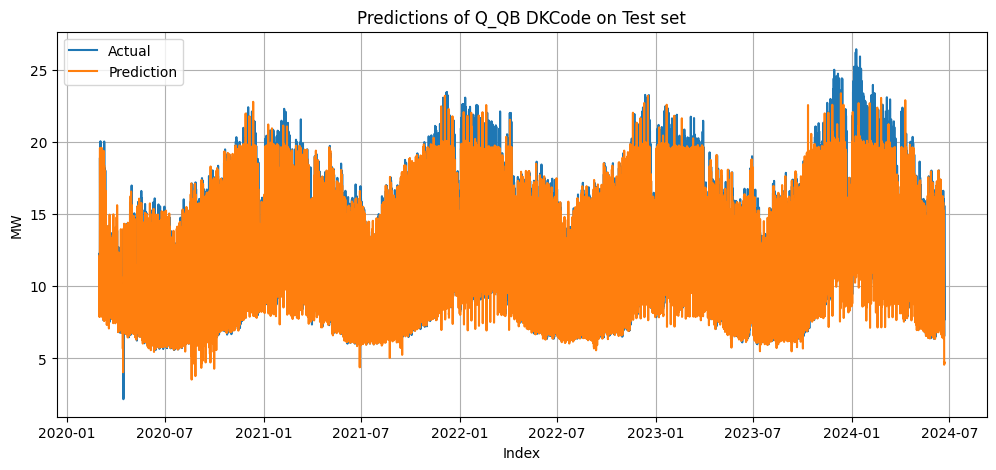

Training RandomForestRegressor model with DKCode:  R_R


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.224983342033885
Mean Squared Error (MSE): 4.175696631165899
Root Mean Squared Error (RMSE): 2.043452135765822
R-squared (R²): 0.957878165911857
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12      

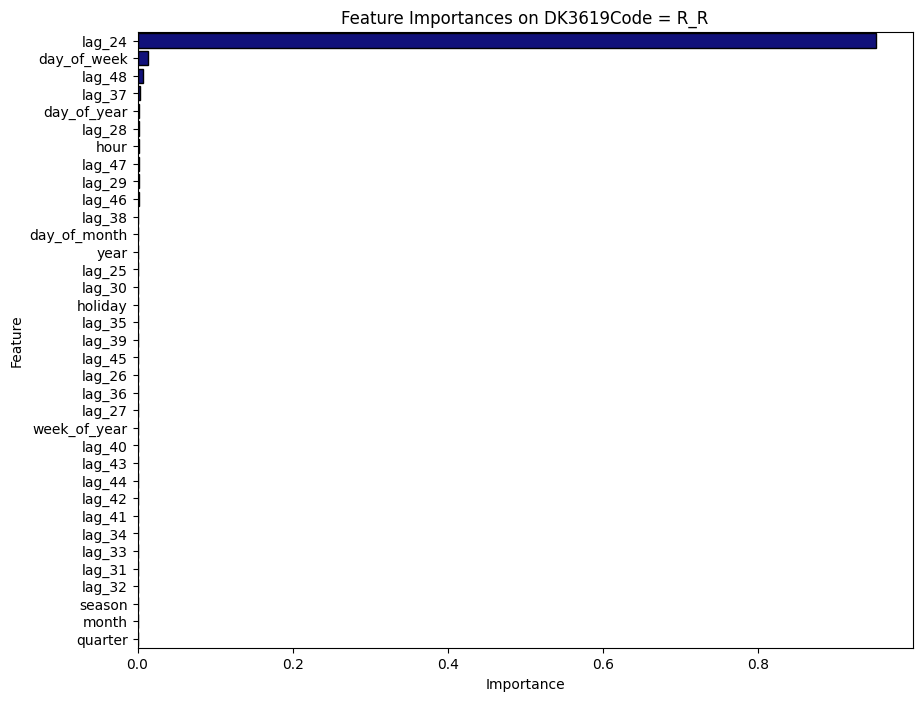

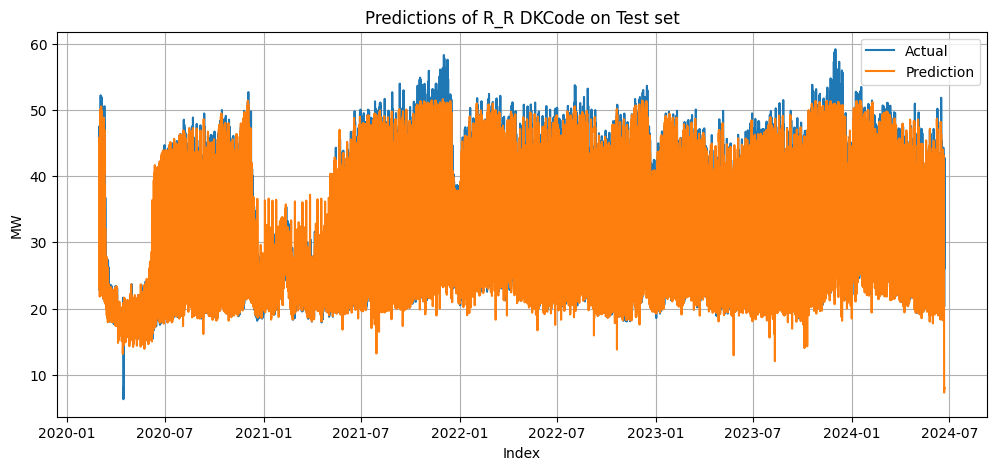

Training RandomForestRegressor model with DKCode:  S_S


/tmp/ipykernel_24/1506323813.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr[lag_column] = df_corr[lag_column].fillna(0)
/tmp/ipykernel_24/1506323813.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
/tmp/ipykernel_24/1506323813.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.py

Mean Absolute Error (MAE): 1.7505415342896096
Mean Squared Error (MSE): 7.733263467826884
Root Mean Squared Error (RMSE): 2.780874586856963
R-squared (R²): 0.9340528987385264
    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12    

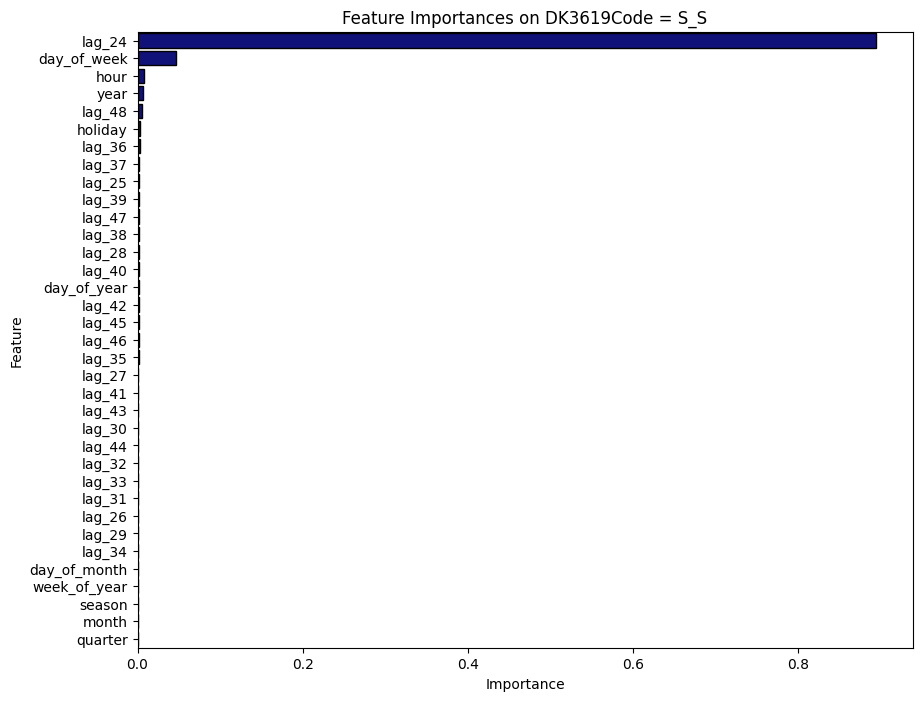

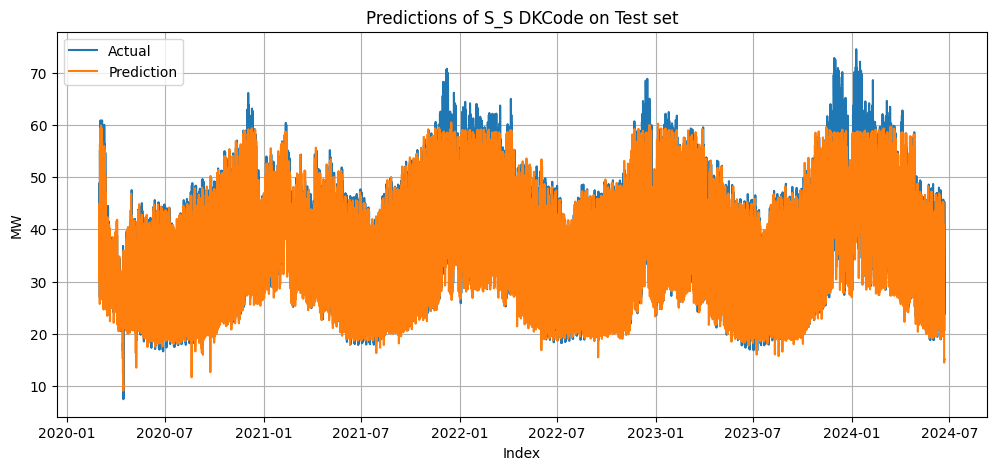

    DK3619Code         MAE           MSE        RMSE        R2
0          A_A    7.352022    130.351276   11.417148  0.901744
1         C_CA    8.148452    150.362493   12.262239  0.936239
2         C_CC    2.487681     15.504810    3.937615  0.954524
3   C_CE_CF_CD    6.641995     79.306226    8.905404  0.623452
4         C_CG    8.286623    125.030142   11.181688  0.872467
5         C_CH    4.854749     65.937317    8.120180  0.967612
6         C_CI    0.372046      0.353595    0.594639  0.952186
7         C_CJ    0.481275      0.585495    0.765176  0.963251
8         C_CK    2.387825     17.702354    4.207417  0.963388
9         C_CL    0.553234      0.734836    0.857226  0.947427
10     C_CM_CB    1.909280      9.598710    3.098179  0.965722
11         D_D  125.887123  47041.194548  216.889821  0.014621
12         E_E    6.475950    112.993821   10.629855  0.621804
13         F_F    2.518807     21.243784    4.609098  0.905790
14         G_G    9.712345    362.280027   19.033655  0

In [4]:
#all_dkcode_trainings
if not os.path.exists("/kaggle/working/Checkpoints/"):
    os.makedirs("/kaggle/working/Checkpoints/")
    
#all_dkcode_trainings
if not os.path.exists("/kaggle/working/Prediction/"):
    os.makedirs("/kaggle/working/Prediction/")
    
# Initialize an empty DataFrame to store the performance metrics
performance_df = pd.DataFrame(columns=['DK3619Code', 'MAE', 'MSE', 'RMSE', 'R2'])

# Initialize an empty DataFrame to store feature importances
feature_importances_df = pd.DataFrame()


for i in dkcode_list:
    if os.path.exists("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl"):
        continue
    print('Training RandomForestRegressor model with DKCode: ', i)
    df_filter = df[df['DK3619Code'] == i]
    df_corr = df_filter[columns]
    
    # Fill NaN values for lag columns
    for lag in range(24, 49):  # Loop from lag_24 to lag_48
        lag_column = f'lag_{lag}'
        df_corr[lag_column] = df_corr[lag_column].fillna(0)
#     df_corr['lag_24'] = df_corr['lag_24'].fillna(0)

    df_corr['HourUTC'] = pd.to_datetime(df_corr['HourUTC'])
    df_corr['HourDK'] = pd.to_datetime(df_corr['HourDK'])

    df_corr = df_corr.sort_values(by='HourDK')

    # Split the data
    split_time = pd.Timestamp("2020-02-01")
    df_train, df_temp = split_train_test(df_corr, split_time)
    split_time_valid = pd.Timestamp("2020-03-01")
    df_valid, df_test = split_train_test(df_temp, split_time_valid)
    
    test_time = df_test[['HourDK']]
    
    # Drop datetime columns after splitting
    df_train = df_train.drop(['HourUTC', 'HourDK'], axis=1)
    df_valid = df_valid.drop(['HourUTC', 'HourDK'], axis=1)
    df_test = df_test.drop(['HourUTC', 'HourDK'], axis=1)

    # Define target and features
    y_train = df_train[['Consumption_MWh']]  # Target variable
    x_train = df_train.drop(columns=['Consumption_MWh'])  # Features

    y_valid = df_valid[['Consumption_MWh']]
    x_valid = df_valid.drop(columns=['Consumption_MWh'])

    y_test = df_test[['Consumption_MWh']]
    x_test = df_test.drop(columns=['Consumption_MWh'])

    # Khởi tạo và fit model
    model = RandomForestRegressor(n_estimators=100, random_state=10)
    model.fit(x_train, y_train)

#     # Lưu model
#     joblib.dump(model, "/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")
#     # Load model from file
#     model = joblib.load("/kaggle/working/Checkpoints/" + i + "_RandomForestRegressor_model.pkl")

    y_pred = model.predict(x_test)
    
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Absolute Error (MAE): {mae}')
    print(f'Mean Squared Error (MSE): {mse}')
    print(f'Root Mean Squared Error (RMSE): {rmse}')
    print(f'R-squared (R²): {r2}')

    # Append metrics to the performance DataFrame
    performance_df = pd.concat([performance_df, pd.DataFrame({
        'DK3619Code': [i],
        'MAE': [mae],
        'MSE': [mse],
        'RMSE': [rmse],
        'R2': [r2]
    })], ignore_index=True)
    
    print(performance_df)
    
    # Create a DataFrame for feature importances
    features = x_train.columns
    feature_importances = model.feature_importances_
    temp_importance_df = pd.DataFrame({'Feature': features, i: feature_importances})
    
    # Merge or initialize feature_importances_df
    if feature_importances_df.empty:
        feature_importances_df = temp_importance_df
    else:
        feature_importances_df = pd.merge(feature_importances_df, temp_importance_df, on='Feature', how='outer')

    print(feature_importances_df)
    
    
    # Create a DataFrame for visualization
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    # Plot the feature importances with custom colors
    plt.figure(figsize=(10, 8))
    sns.barplot(
        x='Importance', 
        y='Feature', 
        data=importance_df, 
        palette=['#00008B'] * len(importance_df),  # Dark blue color for bars
        edgecolor='black'  # Black border for bars
    )
    plt.title("Feature Importances on DK3619Code = " + i)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
    
    
    pred_df = compute_predictions_df(model, x_test, y_test)

    # Merge data into df_corr
    pred_df = pd.merge(test_time, pred_df, left_index=True, right_index=True)
    pred_df = pred_df[['HourDK', 'actual', 'prediction', 'squared_error']]
    
    pred_df.to_csv("/kaggle/working/Prediction/" + i + "_DF_Prediction.csv", index=False)
    
    plt.figure(figsize=(12, 5))
    start = pred_df['HourDK'].min()
    end = pred_df['HourDK'].max()
    plt.plot(pred_df['HourDK'], pred_df['actual'], label='Actual')
    plt.plot(pred_df['HourDK'], pred_df['prediction'], label='Prediction')
    plt.title("Predictions of " + i + " DKCode on Test set")
    plt.xlabel('Index')
    plt.ylabel('MW')
    plt.legend()
    plt.grid()
    plt.show()

# Save performance DataFrame to CSV
performance_df.to_csv("/kaggle/working/Performance_Metrics_Fullfeature.csv", index=False)

# Save feature importances DataFrame to CSV
feature_importances_df.to_csv("/kaggle/working/Feature_Importances.csv", index=False)

# Display the performance DataFrame
print(performance_df)

# Display the feature importances DataFrame
print(feature_importances_df)